# Telecom Churn Case Study

#### Author:RajaRajalakshmi K
#### Problem Statement:

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to -identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

## Importing Telecom Data

In [4]:
telecom_df = pd.read_csv('telecom_churn_data.csv')

In [5]:
telecom_df.info()
telecom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Data Preparation


In [7]:
#Fill the missing values with zero
telecom_df.av_rech_amt_data_9.fillna(value=0, inplace=True)

columns_to_be_imputed_with_zero = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
for col in columns_to_be_imputed_with_zero:
    telecom_df[col].fillna(value=0, inplace=True)

In [8]:
telecom_df['total_rech_data_amt_6'] = telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']
telecom_df['total_rech_data_amt_8'] = telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']
telecom_df['total_rech_data_amt_9'] = telecom_df['av_rech_amt_data_9'] * telecom_df['total_rech_data_9']

### Filter high-value customers and Tag churners

In [9]:
# create Churn data

telecom_df1 = telecom_df
telecom_df1['total_rech_amt_good_phase'] = ((telecom_df1['total_rech_amt_6'] + telecom_df1['total_rech_data_amt_6']+telecom_df1['total_rech_amt_7'] + telecom_df1['total_rech_data_amt_7'])/2)/2
telecom_df1 = telecom_df1[telecom_df1['total_rech_amt_good_phase'] >= telecom_df1['total_rech_amt_good_phase'].quantile(0.70)]

telecom_df1['total_usage_col'] = telecom_df1['total_og_mou_9'] + telecom_df1['total_ic_mou_9'] + telecom_df1['vol_2g_mb_9'] + telecom_df1['vol_3g_mb_9']

telecom_df1['churn'] = np.where(telecom_df1['total_usage_col']== 0, 1, 0)
telecom_df1['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

#### No of high value custmers = 300001
#### Where No. of churners = 2441
#### Where No. of non- churners = 27560

In [10]:
telecom_df1 = telecom_df1.drop(['total_rech_amt_good_phase','total_usage_col'],1)

### Remove all the attributes corresponding to the churn phase

In [11]:
nine_col = [col for col in telecom_df1.columns if '_9' in col]
print(telecom_df1.shape)
telecom_df1 = telecom_df1.drop(nine_col, axis = 1)
print(telecom_df1.shape)
telecom_df1 = telecom_df1.drop('sep_vbc_3g', axis=1)

(30001, 231)
(30001, 176)


### Churn rate-

In [12]:
y = telecom_df1['churn']
churn = (sum(y)/len(y.index))*100
print(churn)
print(telecom_df1.shape)

## Churn rate is 8.13.

8.136395453484884
(30001, 175)


In [13]:
telecom_df1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,3.000100e+04,30001.0,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.0,29464.0,28827.0,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,16756.000000,17057.000000,15953.000000,

In [14]:
round(100*(telecom_df1.isnull().sum()/len(telecom_df1.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

### Dropping colums with only one unique value (showing zero variance)

In [15]:
def diversity_percentage(df):
    """
    This function returns the number of different elements in each column as a percentage of the total elements in the group.
    A low value indicates there are many repeated elements.
    Example 1: a value of 0 indicates all values are the same.
    Example 2: a value of 100 indicates all values are different.
    """
    diversity = dict()
    columns = df.columns.values.tolist()
    for col in columns:
        diversity[col] = len(df[col].unique())

    diversity_series = pd.Series(diversity)
    return (100*diversity_series/len(df)).sort_values()

In [16]:
diversity_percentage(telecom_df1)

circle_id                     0.003333
last_date_of_month_6          0.003333
std_ic_t2o_mou_7              0.006666
std_ic_t2o_mou_8              0.006666
std_ic_t2o_mou_6              0.006666
std_og_t2c_mou_8              0.006666
std_og_t2c_mou_7              0.006666
std_og_t2c_mou_6              0.006666
churn                         0.006666
loc_ic_t2o_mou                0.006666
last_date_of_month_8          0.006666
std_og_t2o_mou                0.006666
loc_og_t2o_mou                0.006666
last_date_of_month_7          0.006666
fb_user_8                     0.010000
fb_user_7                     0.010000
fb_user_6                     0.010000
night_pck_user_8              0.010000
night_pck_user_7              0.010000
night_pck_user_6              0.010000
monthly_2g_6                  0.016666
monthly_2g_7                  0.019999
monthly_2g_8                  0.019999
monthly_3g_8                  0.039999
monthly_3g_6                  0.039999
monthly_3g_7             

In [17]:
#delete coloum as all value are zero or constant
#diversity is less than or equal to 0.010000
telecom_df2 = telecom_df1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [18]:
#Droping columns
fields_to_be_dropped = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for field in fields_to_be_dropped:
    for month in ['6', '7', '8']:
        field_to_be_dropped = field + '_' + month
        telecom_df2 = telecom_df2.drop([field_to_be_dropped], 1)
        
print(telecom_df2.shape)

(30001, 132)


In [19]:
fields_to_be_imputed_with_2 = ['date_of_last_rech']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        telecom_df2[field_to_be_imputed_with_2].fillna(telecom_df2[field_to_be_imputed_with_2].mode()[0], inplace=True)

In [20]:
telecom_df2['date_of_last_rech_6'] = pd.to_datetime(telecom_df2.date_of_last_rech_6).dt.day
telecom_df2['date_of_last_rech_7'] = pd.to_datetime(telecom_df2.date_of_last_rech_7).dt.day
telecom_df2['date_of_last_rech_8'] = pd.to_datetime(telecom_df2.date_of_last_rech_8).dt.day

#### Imputing missing observations with Median column value

In [21]:
missing_cols = telecom_df2.columns[telecom_df2.isnull().sum()>0]
for col in missing_cols:
    telecom_df2[col].fillna((telecom_df2[col].median()), inplace=True)

In [22]:
round(100*(telecom_df2.isnull().sum()/len(telecom_df2.index)), 2)

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou

In [23]:
telecom_df3 = telecom_df2
telecom_df3.shape

(30001, 132)

## Outlier Treatment

In [24]:
telecom_df3.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])
#As we can see we have outlier.

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,262.392728,269.374484,236.966438,377.865524,382.168481,342.809142,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.949441,86.135734,78.986541,164.700941,164.472076,154.673714,6.346113,6.427442,5.886385,1.575104,1.889875,1.707746,256.430168,257.492080,240.457671,165.946334,174.293040,14

In [25]:
cols_for_outlier_treatment = [col for col in telecom_df3.columns if col not in ['churn','mobile_number']]

for col in cols_for_outlier_treatment:
    percentiles = telecom_df3[col].quantile([0.01,0.99]).values
    telecom_df3[col][telecom_df3[col] <= percentiles[0]] = percentiles[0]
    telecom_df3[col][telecom_df3[col] >= percentiles[1]] = percentiles[1]

In [26]:
telecom_df3.shape

(30001, 132)

In [27]:
telecom_df3.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,548.809784,551.084737,498.243103,253.765738,260.178846,227.749471,370.064642,373.582307,332.771052,13.572928,9.636307,9.763929,22.732495,16.688892,15.985223,76.741379,77.145683,70.640741,159.123232,159.665369,150.222294,5.645208,5.735388,5.285765,1.362552,1.575163,1.481738,248.976215,249.663702,233.340675,158.109714,166.106217,140.342272,171

### Creating derived colums
- Median value of Internet usage (2G + 3G)
- The AON variable was used to create aon_bins

In [28]:

telecom_df3['internet_median'] = telecom_df3[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
telecom_df3['internet_median'] = telecom_df3.internet_median.map(lambda x: 1 if x == 0 else 0)
telecom_df3 = telecom_df3.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


telecom_df3['aon_bin'] = np.round(telecom_df3['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_df3['aon_bin'] = pd.cut(telecom_df3['aon_bin'], bins)
telecom_df3['aon_bin'].value_counts()

(4, 10]    8978
(1, 2]     7819
(0, 1]     5789
(2, 3]     4496
(3, 4]     2919
Name: aon_bin, dtype: int64

### Correlation Analysis

In [29]:
# Create correlation matrix
corr_matrix = telecom_df3.corr().abs()

# Selecting the upper triangle 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# select feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

telecom_df3 = telecom_df3.drop(to_drop, 1)

In [30]:
telecom_df3.aon_bin.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [31]:
#create dummy for aon_bin 
telecom_df3 = pd.get_dummies(telecom_df3, drop_first=True)

In [32]:
telecom_df3.rename(columns={"aon_bin_(1, 2]": "aon_bin_1_to_2","aon_bin_(2, 3]":"aon_bin_2_to_3",
                   "aon_bin_(3, 4]":"aon_bin_3_to_4",
                   "aon_bin_(4, 10]":"aon_bin_4_to_10"}, inplace=True)

In [33]:
telecom_df3.shape

(30001, 96)

In [34]:
diversity_percentage(telecom_df3)

og_others_8                0.003333
og_others_7                0.003333
aon_bin_4_to_10            0.006666
aon_bin_2_to_3             0.006666
aon_bin_1_to_2             0.006666
internet_median            0.006666
churn                      0.006666
aon_bin_3_to_4             0.006666
monthly_2g_7               0.010000
monthly_2g_8               0.010000
monthly_2g_6               0.010000
monthly_3g_8               0.013333
monthly_3g_7               0.013333
monthly_3g_6               0.013333
sachet_3g_8                0.016666
sachet_3g_6                0.016666
sachet_3g_7                0.019999
sachet_2g_8                0.043332
sachet_2g_7                0.043332
sachet_2g_6                0.043332
date_of_last_rech_6        0.069998
date_of_last_rech_7        0.069998
date_of_last_rech_8        0.086664
spl_ic_mou_7               0.133329
spl_ic_mou_8               0.146662
total_rech_num_8           0.153328
total_rech_num_6           0.156661
total_rech_num_7           0

In [35]:
# After outlier treatment droping column which don't have much variance or zero variance
telecom_df4 = telecom_df3.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [36]:
telecom_df4.shape

(30001, 90)

## Exploratory data analysis

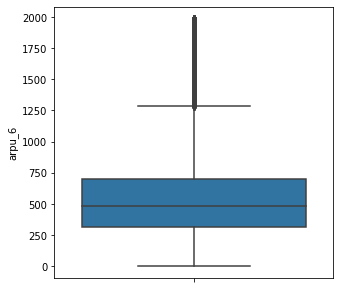

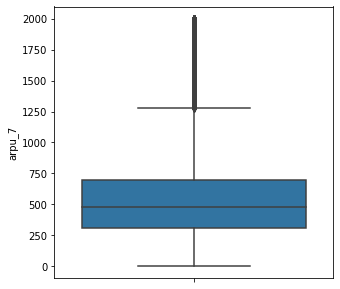

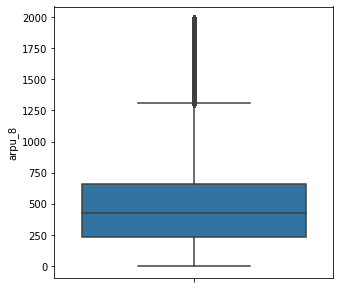

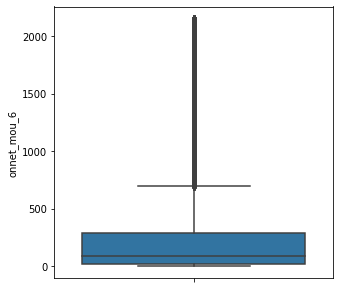

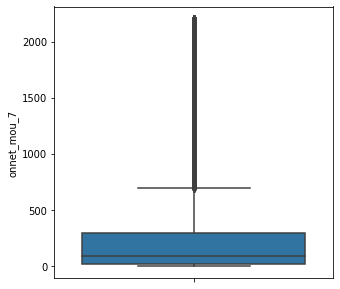

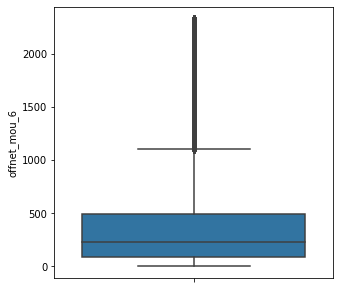

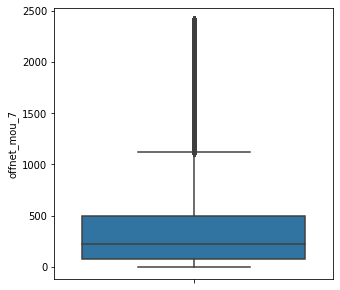

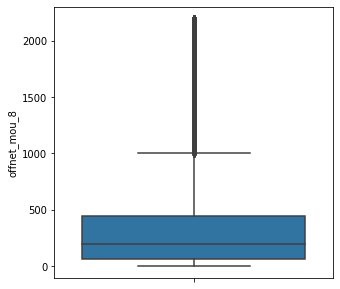

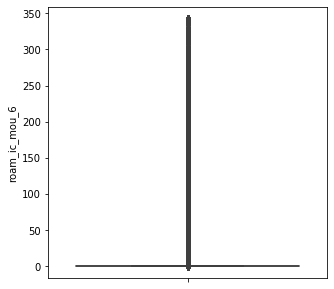

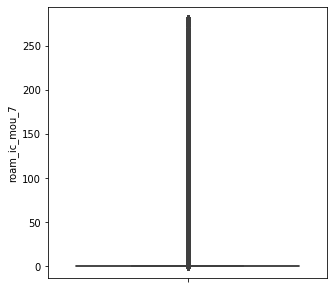

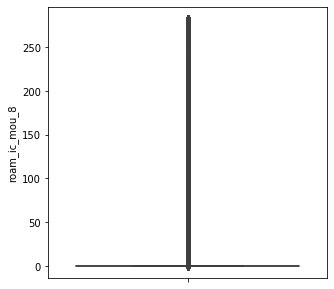

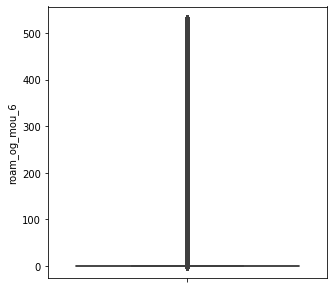

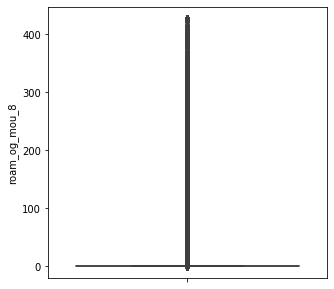

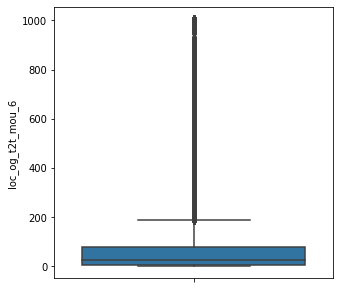

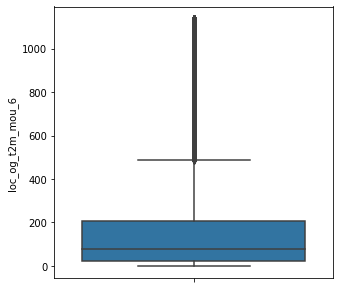

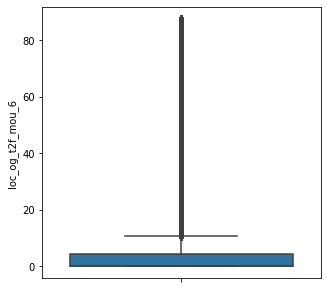

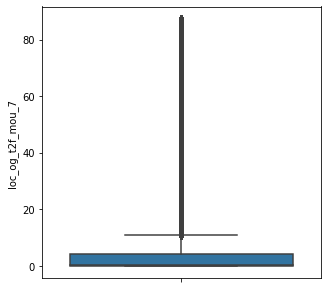

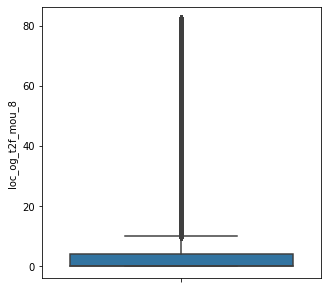

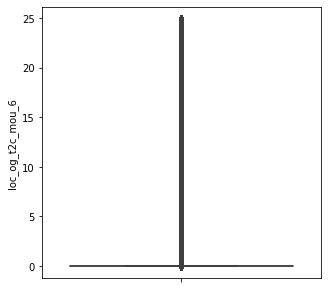

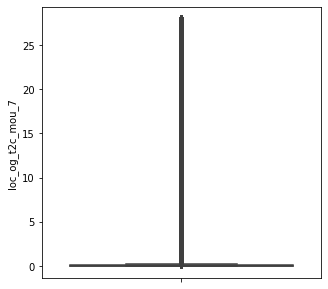

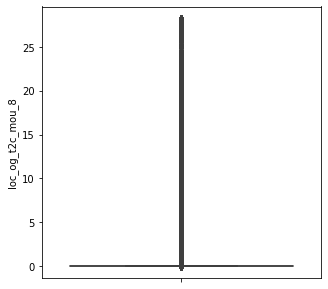

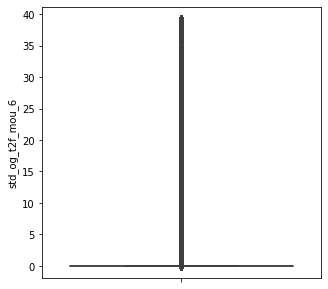

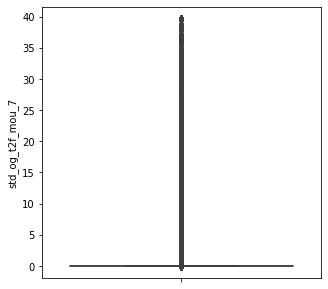

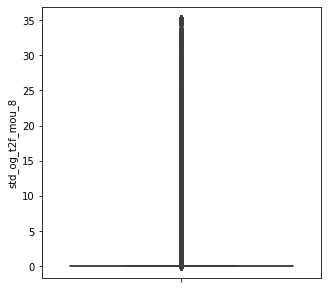

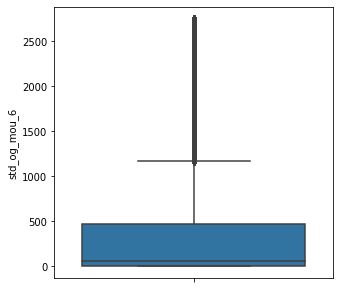

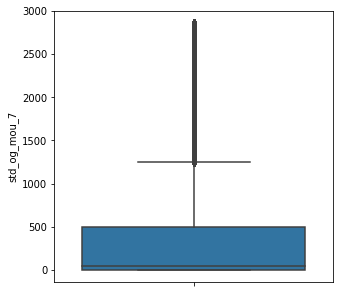

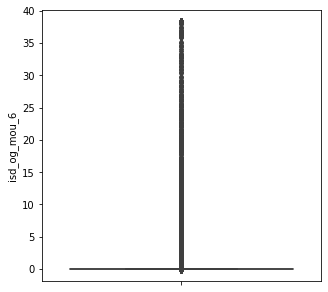

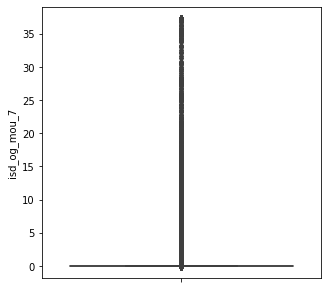

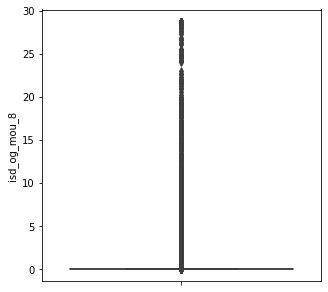

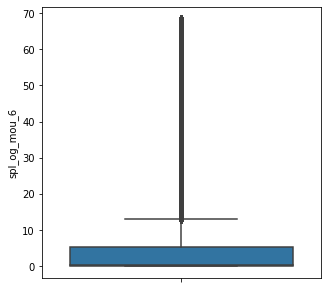

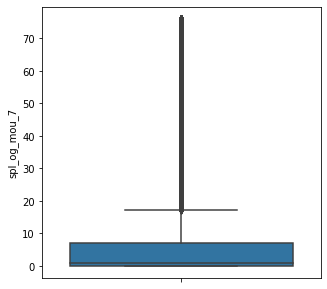

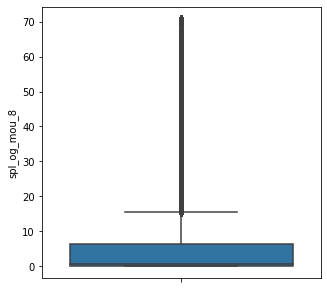

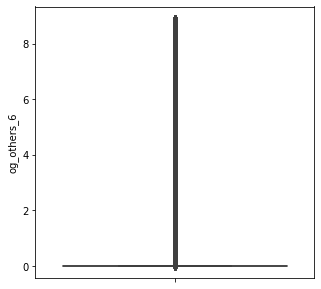

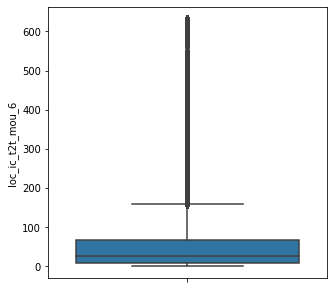

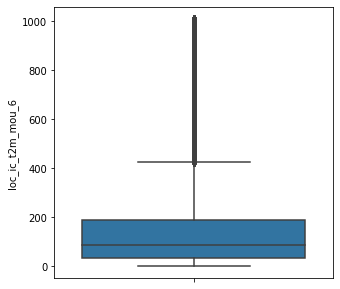

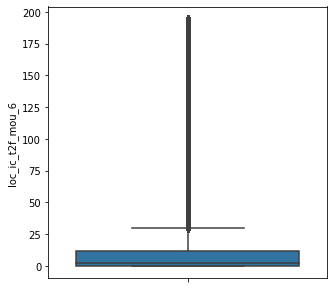

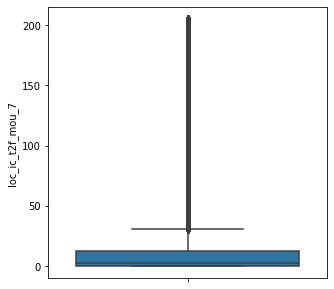

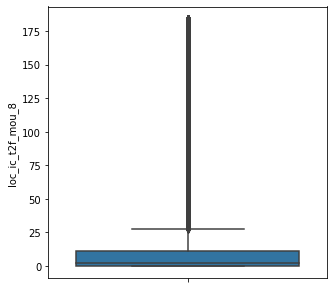

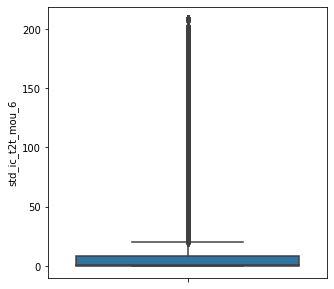

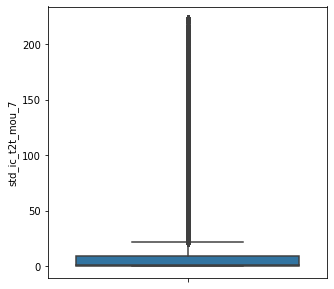

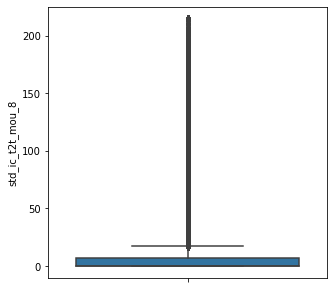

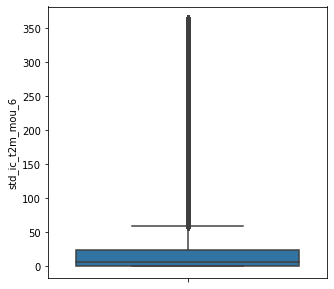

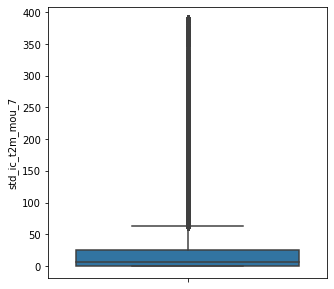

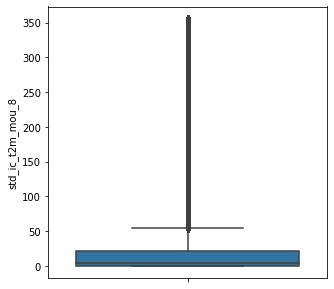

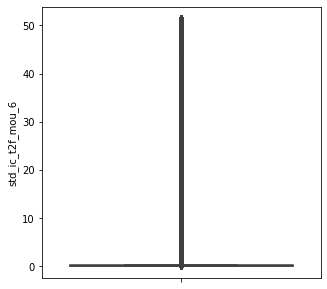

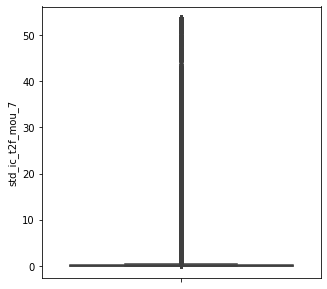

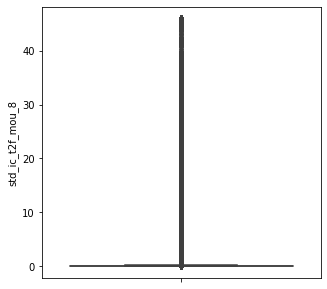

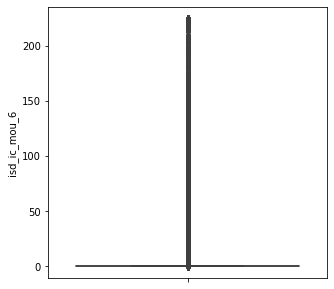

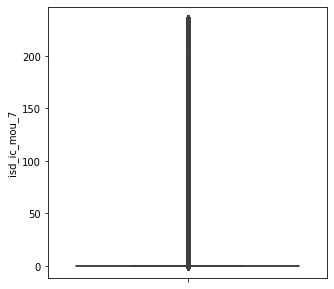

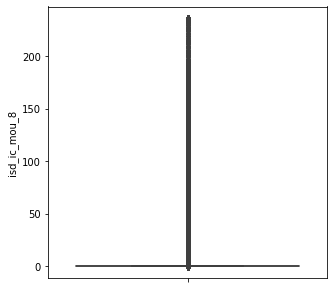

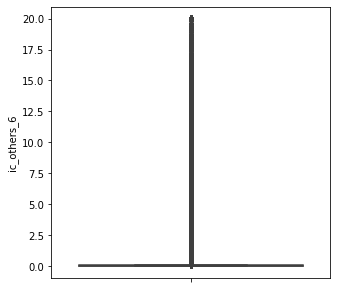

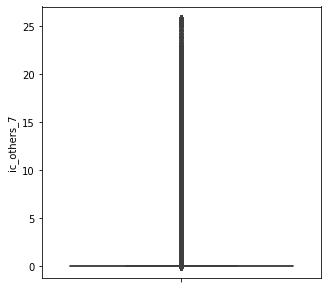

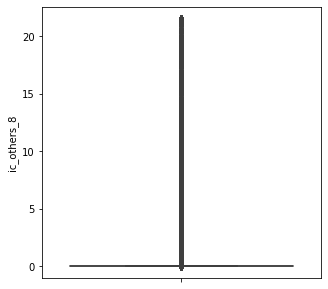

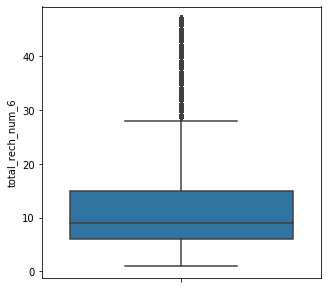

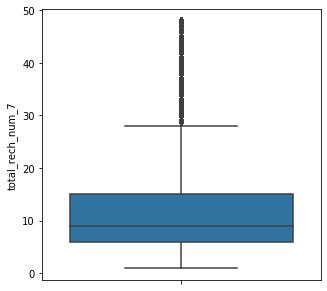

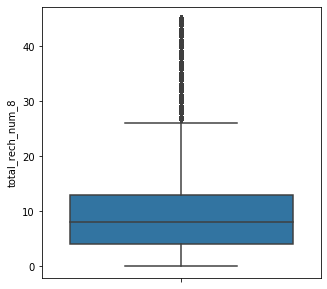

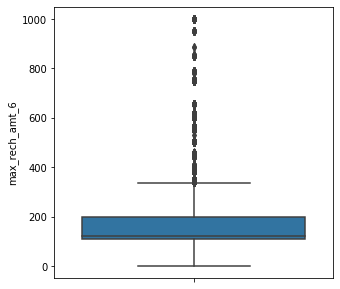

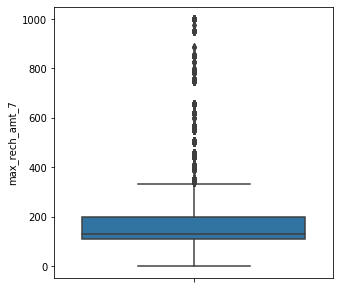

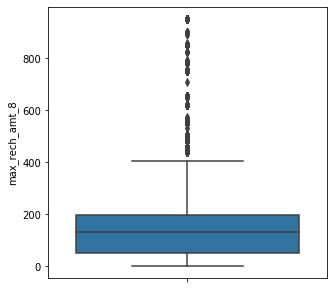

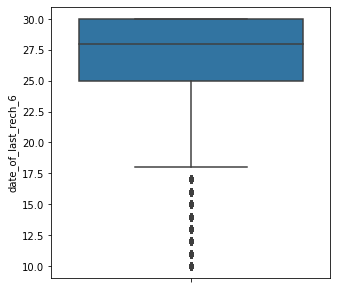

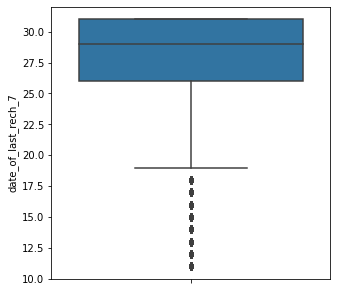

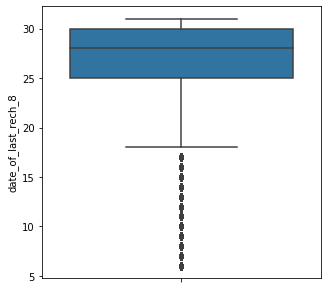

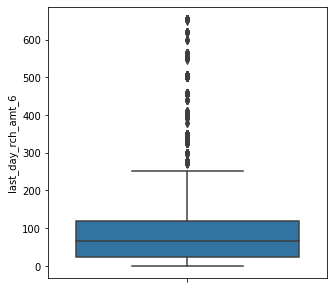

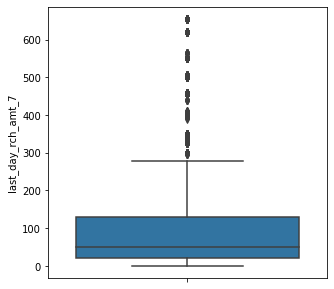

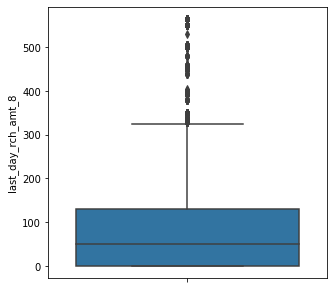

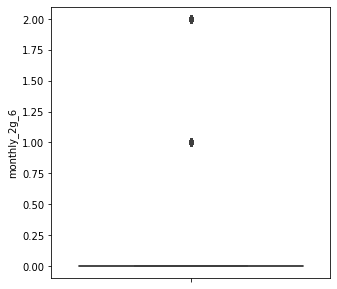

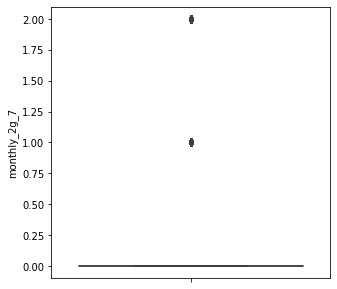

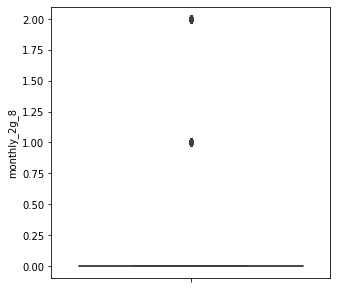

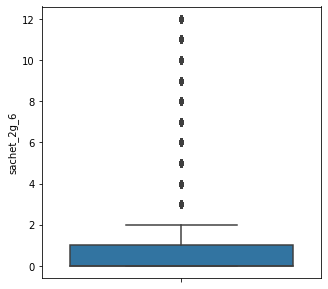

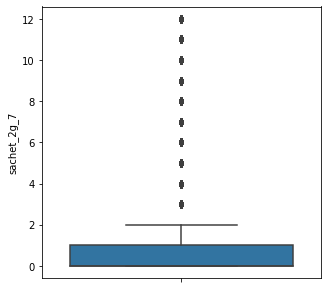

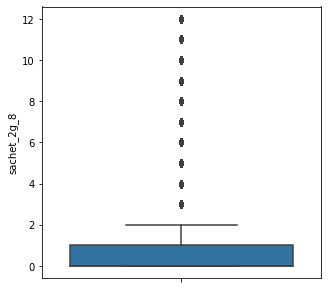

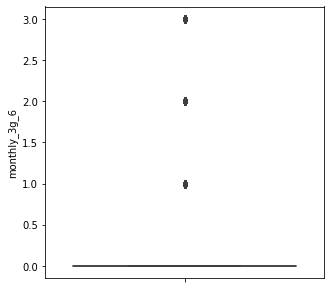

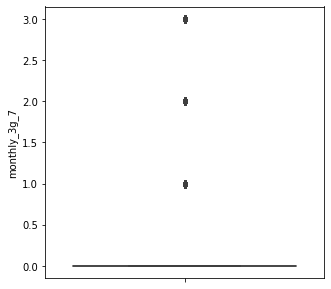

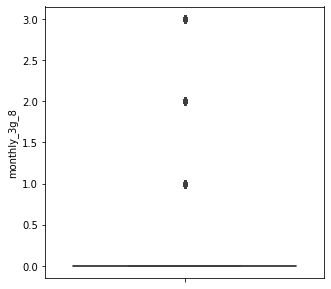

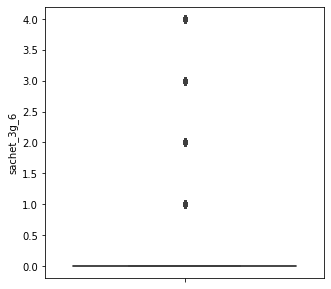

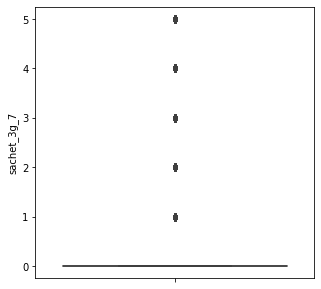

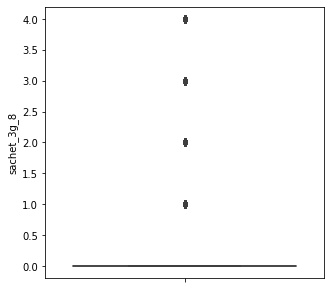

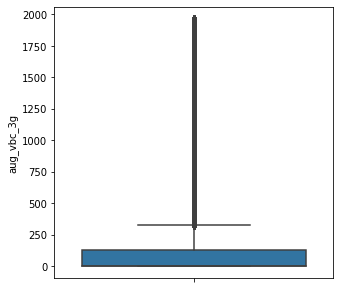

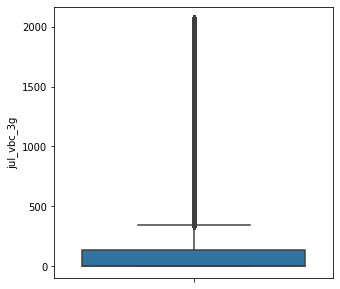

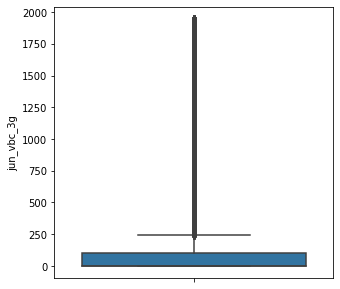

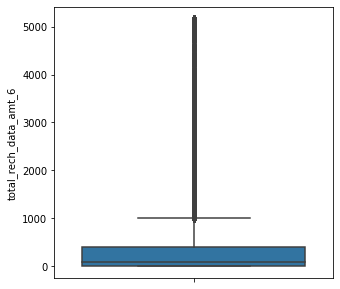

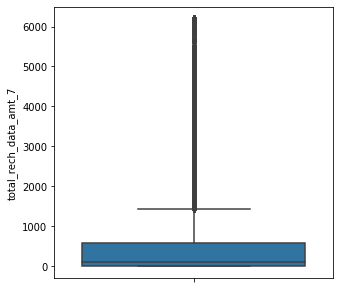

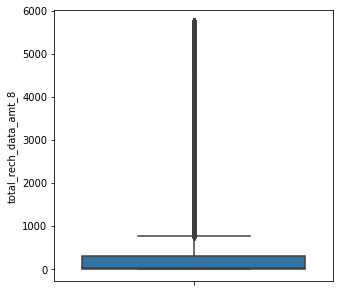

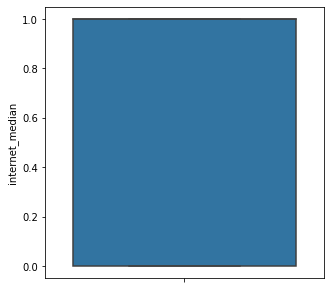

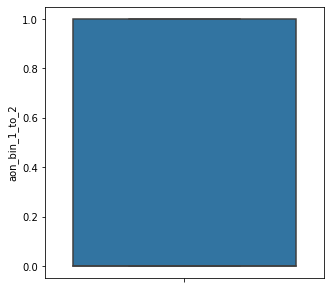

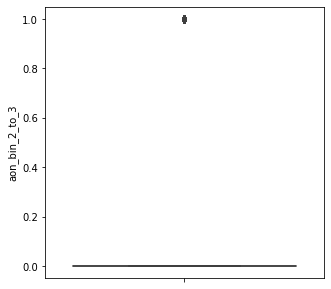

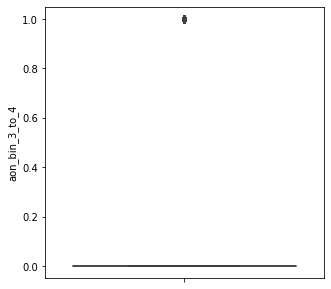

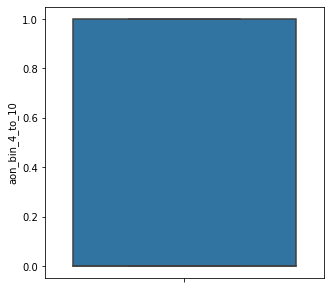

In [37]:
all_columns = [col for col in telecom_df4.columns if col not in ['churn','mobile_number']]
for col in all_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_df4)

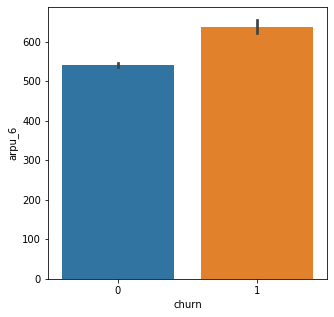

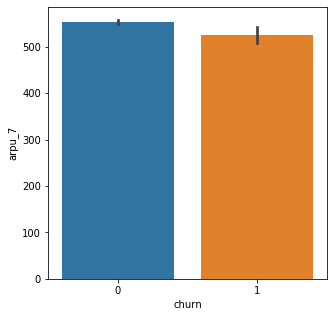

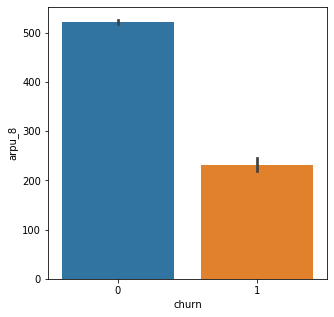

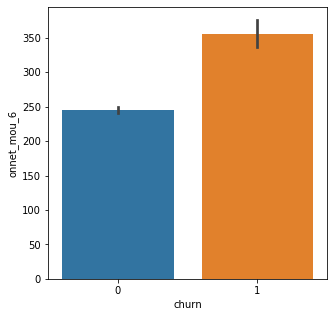

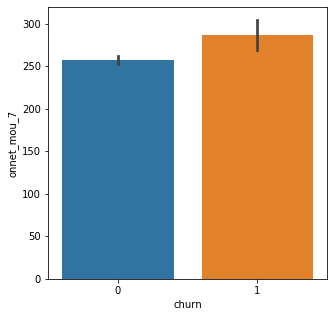

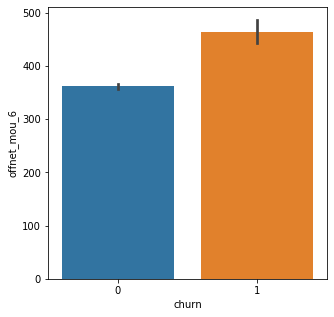

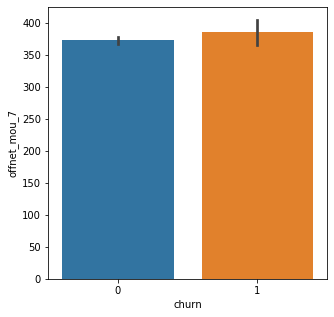

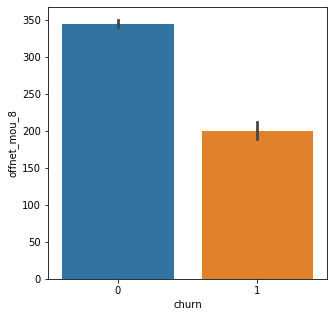

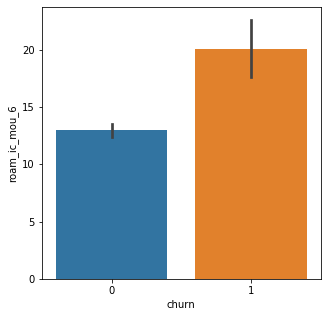

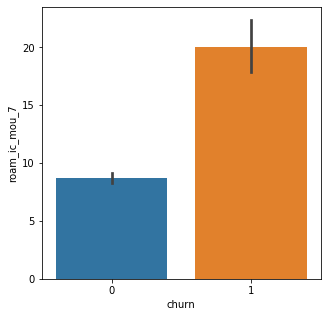

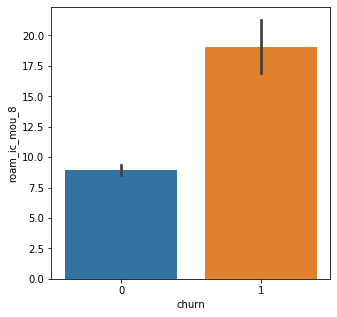

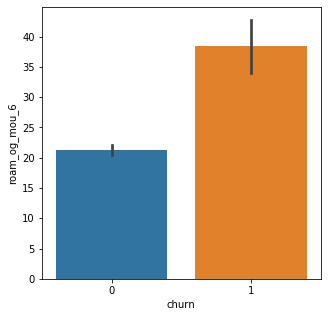

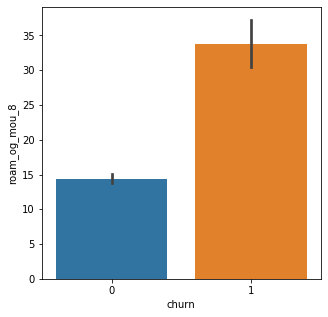

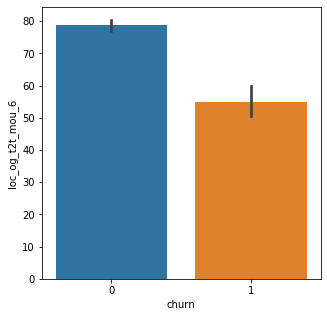

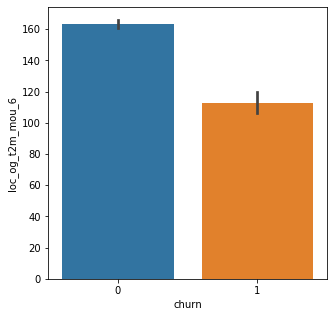

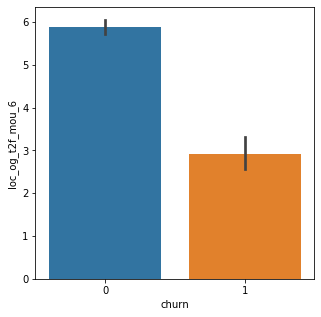

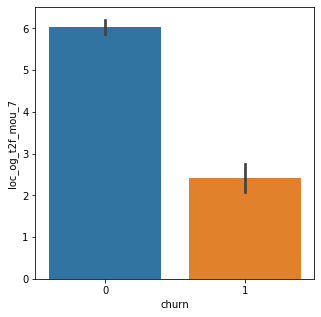

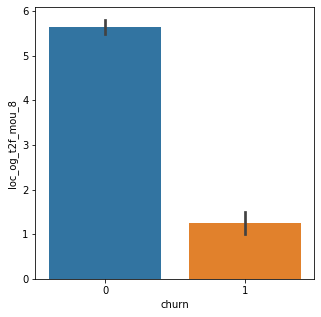

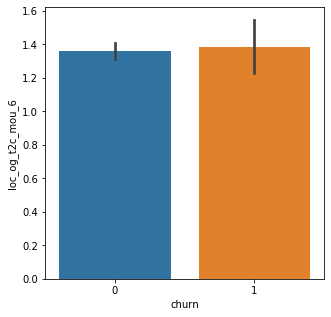

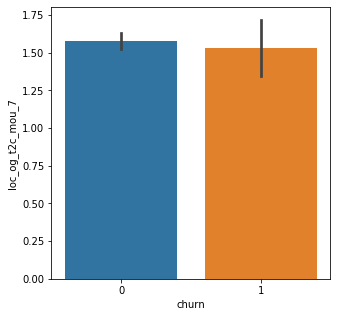

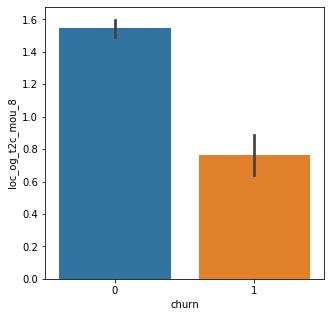

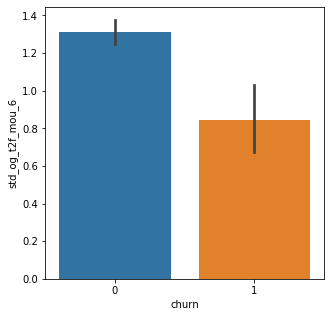

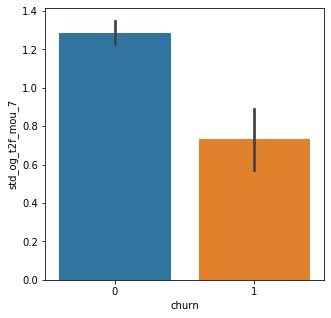

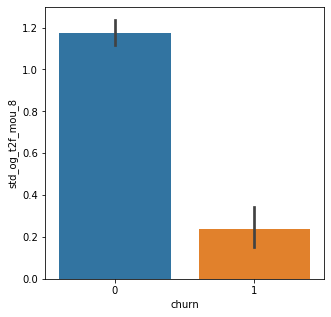

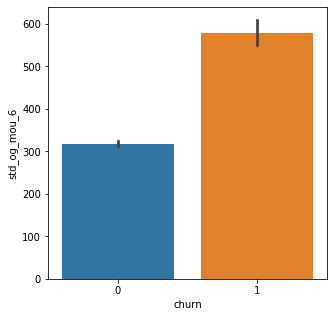

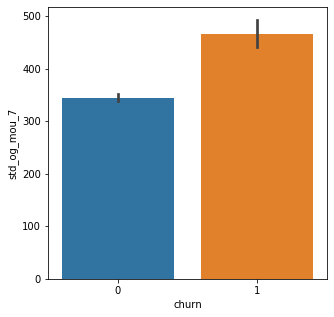

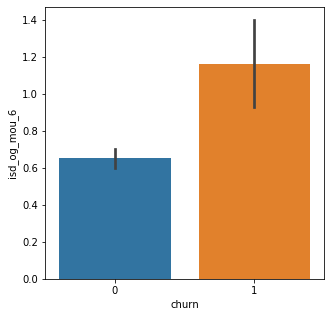

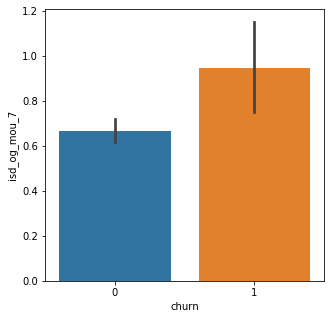

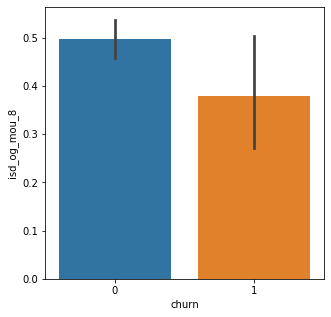

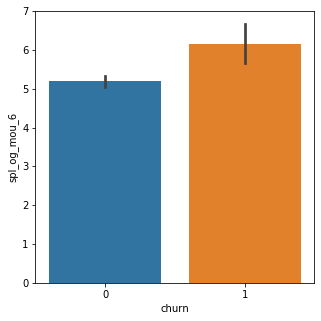

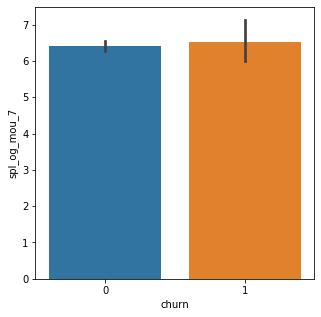

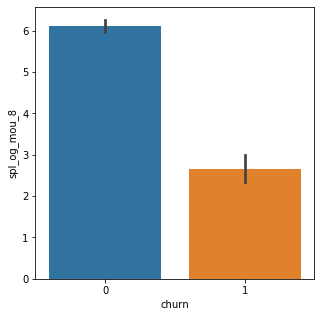

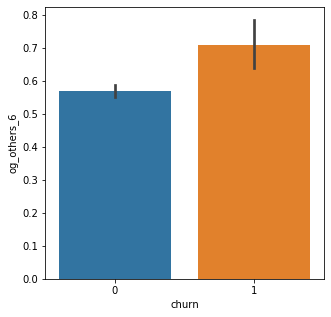

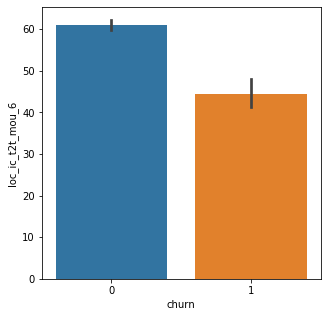

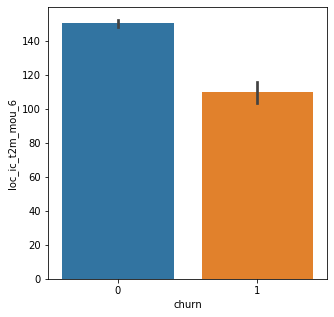

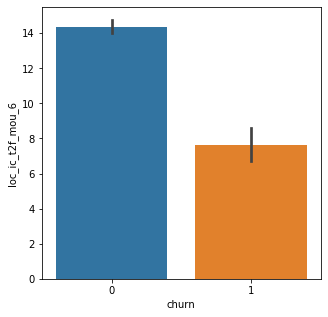

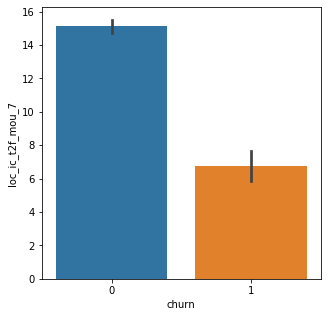

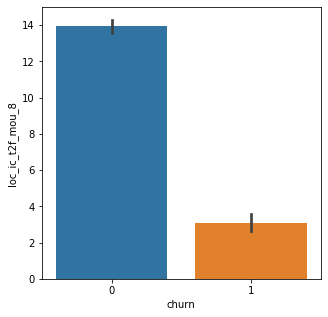

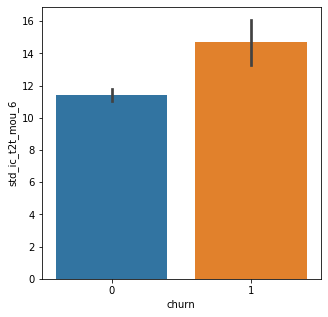

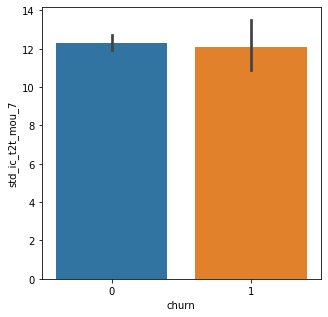

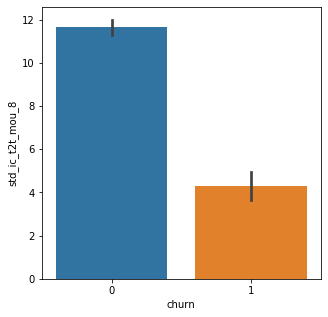

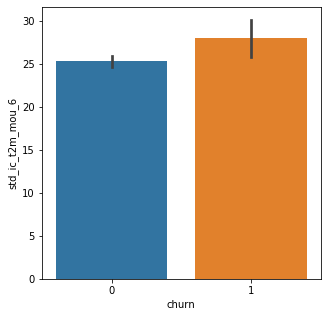

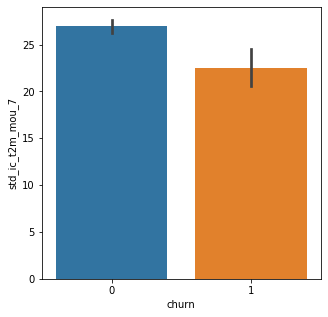

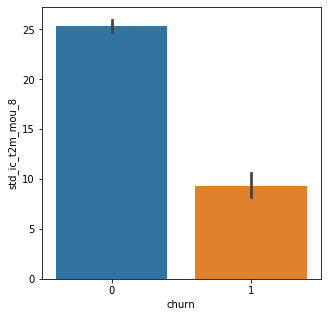

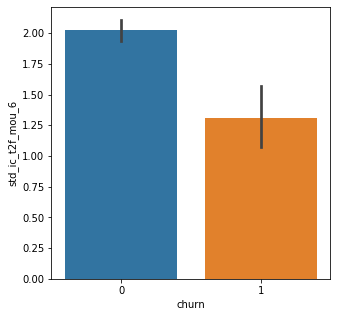

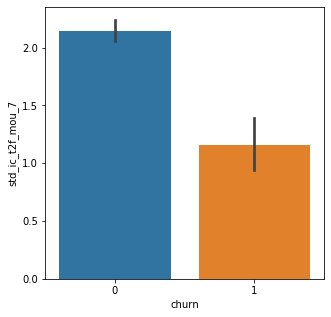

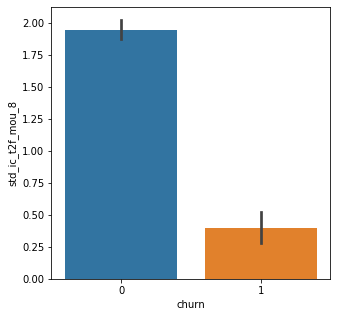

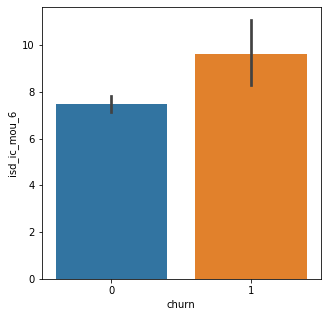

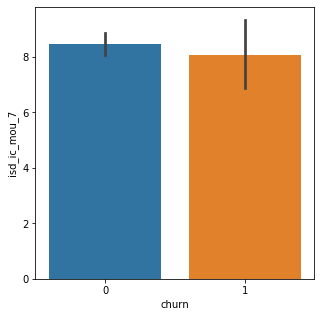

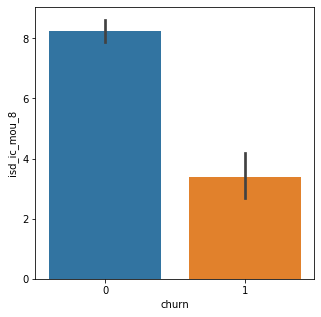

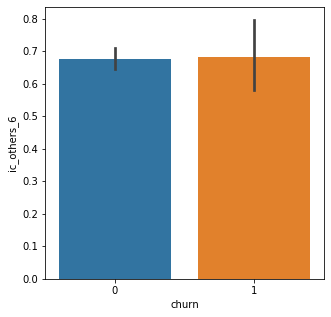

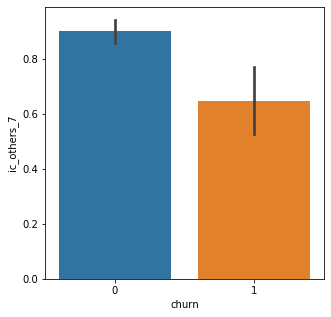

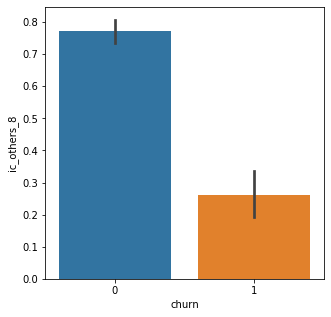

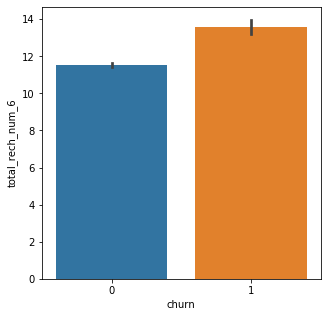

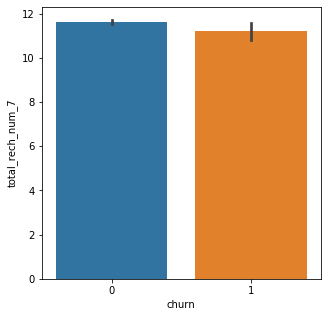

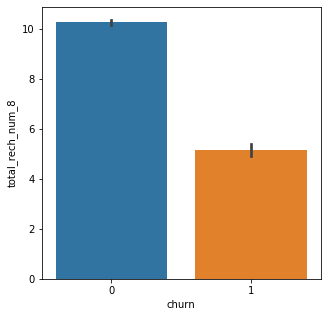

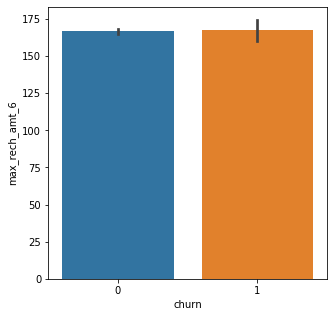

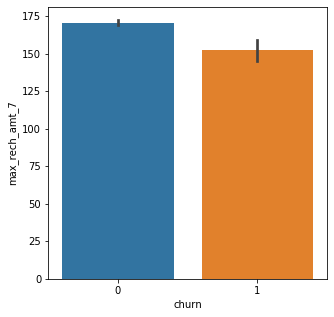

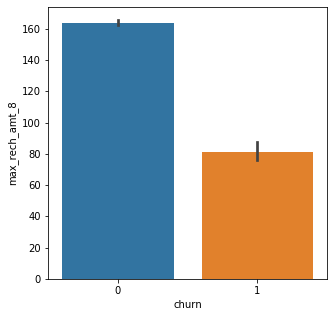

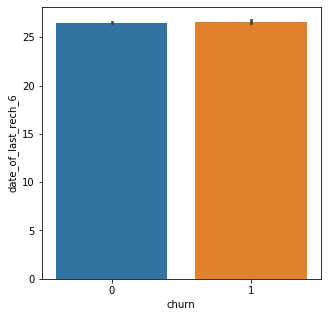

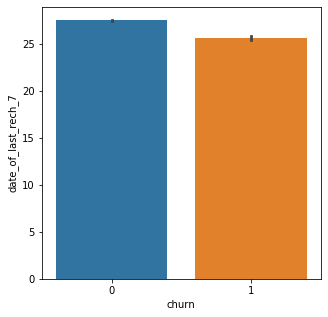

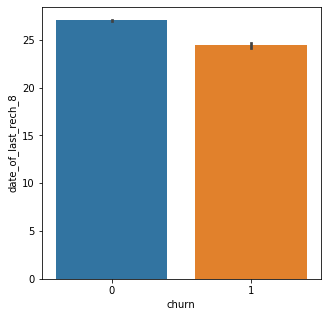

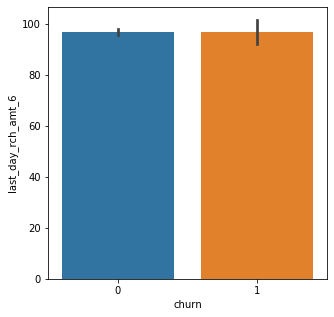

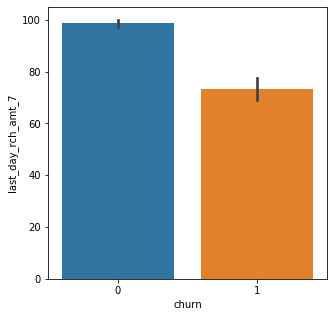

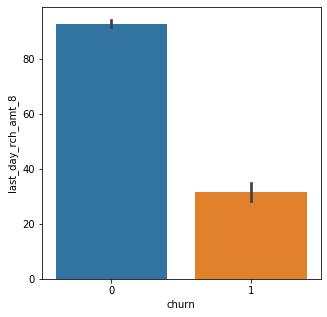

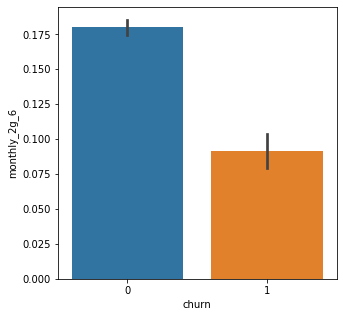

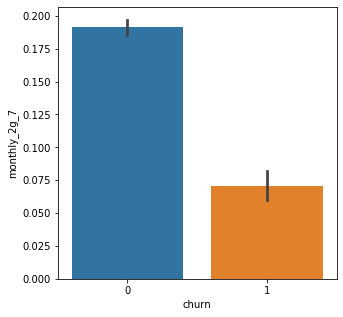

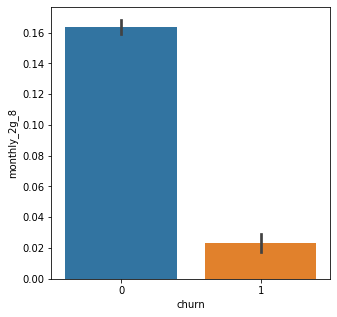

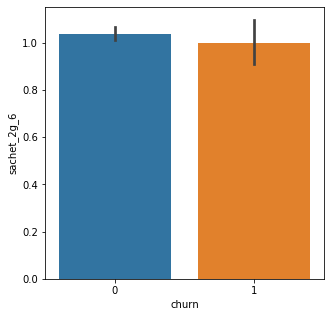

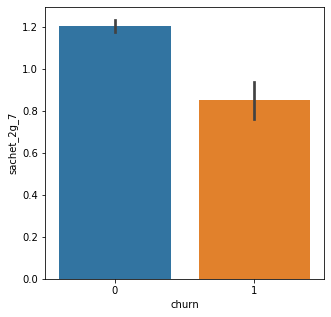

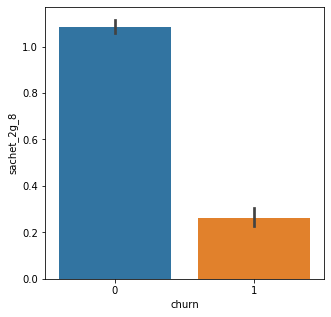

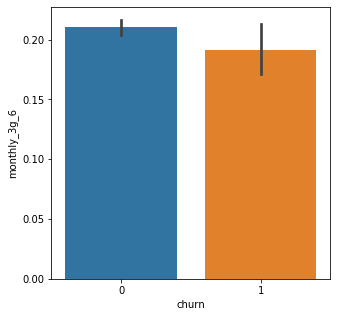

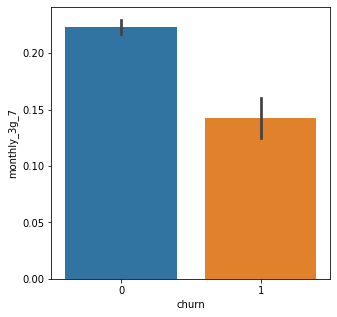

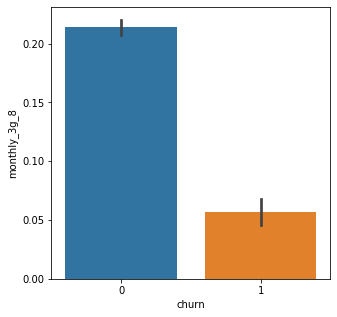

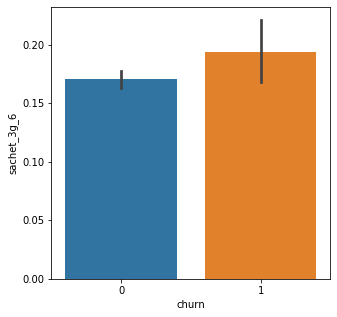

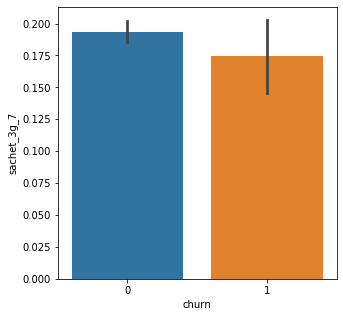

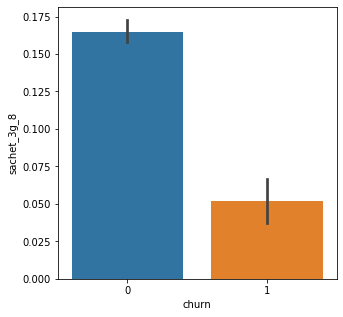

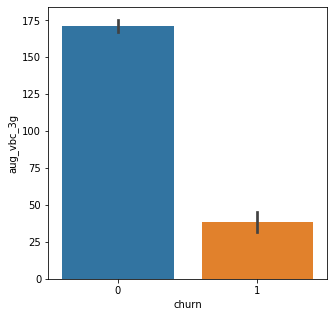

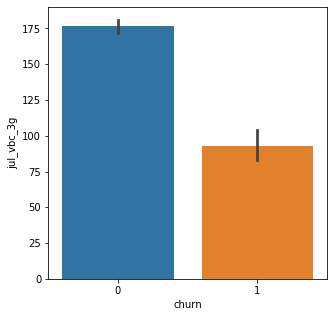

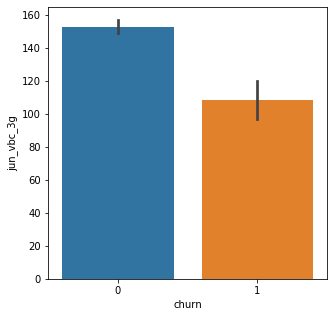

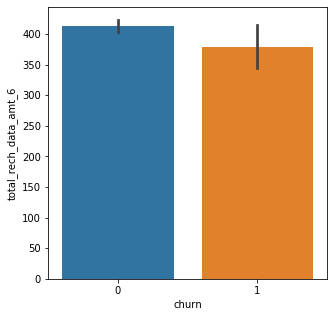

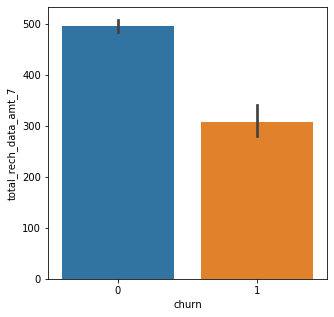

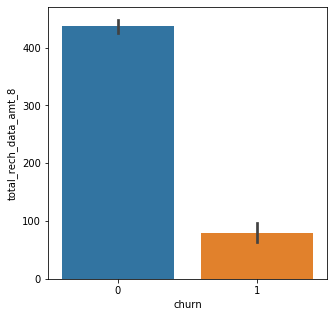

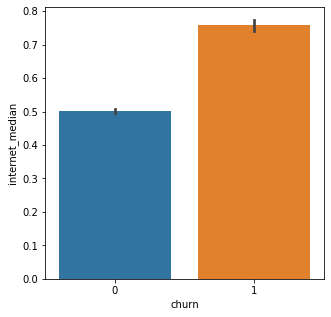

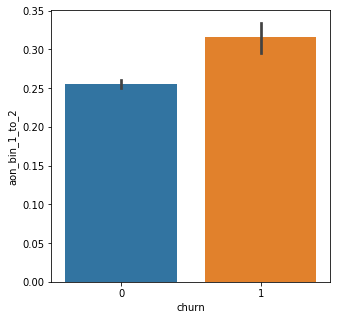

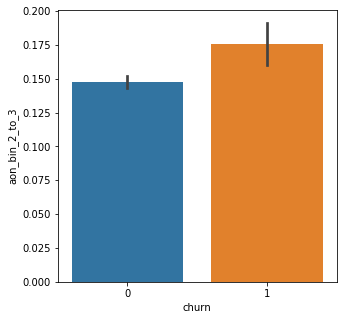

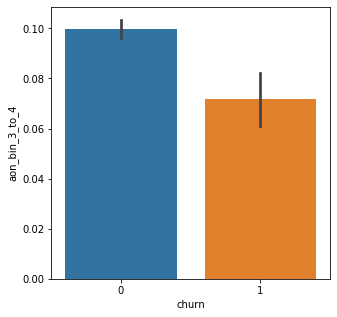

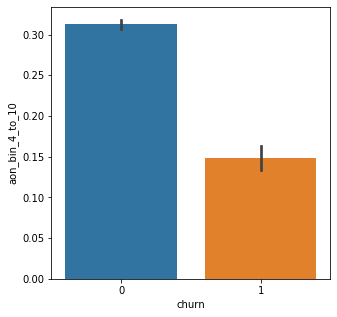

In [38]:
all_cols = [col for col in telecom_df4.columns if col not in ['churn','mobile_number']]
for col in all_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_df4)
    plt.show()



[Text(0, 0.5, '(%)')]

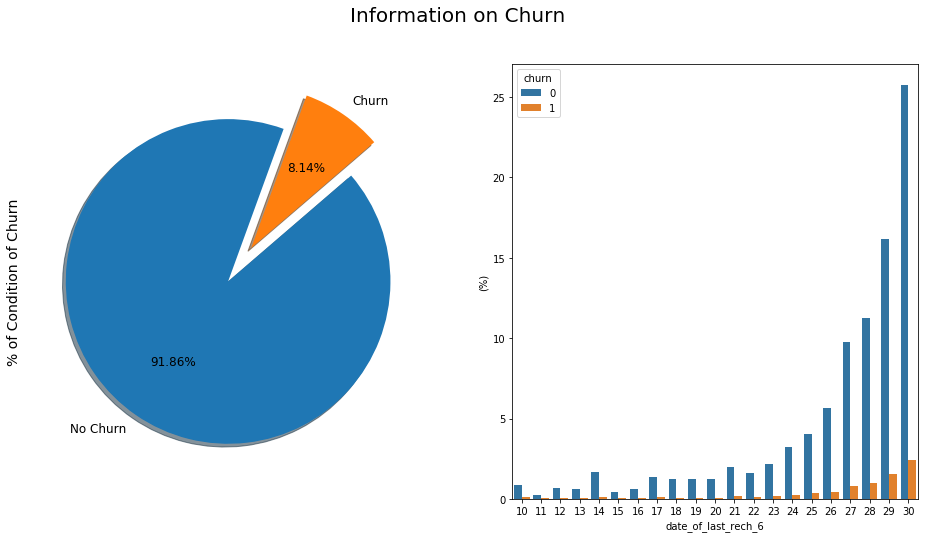

In [39]:
f, ax = plt.subplots(1,2, figsize=(16,8))


labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

telecom_df4["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,  
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)


sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecom_df4,  estimator=lambda x: len(x) / len(telecom_df4) * 100)
ax[1].set(ylabel="(%)")

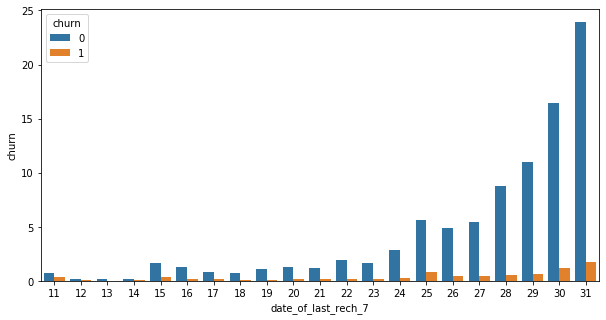

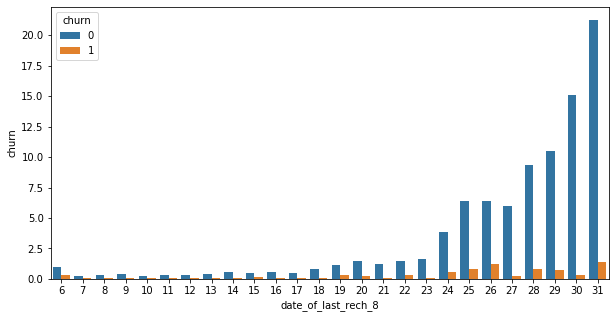

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecom_df4, 
            estimator=lambda x: len(x) / len(telecom_df4) * 100)

plt.figure(figsize=(10,5))
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_df4, 
            estimator=lambda x: len(x) / len(telecom_df4) * 100)

In [41]:
telecom_df4.shape

(30001, 90)

In [42]:
telecom_df5 = telecom_df4
telecom_df5.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,internet_median,aon_bin_1_to_2,aon_bin_2_to_3,aon_bin_3_to_4,aon_bin_4_to_10
0,7000842753,197.385,214.816,213.803,88.06,86.885,229.635,227.12,0.00,0.00,0.00,0.00,0.00,0.00,25.58,80.24,0.11,0.21,0.00,0.0,0.0,0.00,0.00,0.00,0.00,50.795,50.035,0.0,0.00,0.00,0.31,0.81,0.00,0.0,26.03,86.76,2.01,2.16,1.15,0.48,0.55,0.00,5.34,5.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,21,16,8,252,252,252,0,0,0,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,252.0,252.0,252.0,1,0,0,1,0,0
7,7000701601,1069.180,1349.850,1986.622,57.84,54.680,453.430,567.16,325.91,16.23,33.49,31.64,23.74,38.06,51.39,308.63,62.13,55.14,53.23,0.0,0.0,0.00,6.66,20.08,16.68,60.860,75.140,0.0,0.18,10.01,4.50,0.00,6.50,0.0,58.14,217.56,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,51.38,34.24,22.21,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1000,790,951,27,25,26,0,0,565,0,0,0,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.0,0.0,0.0,1,1,0,1,0,0
8,7001524846,378.721,492.223,137.362,413.69,351.030,94.660,80.63,136.48,0.00,0.00,0.00,0.00,0.00,297.13,80.96,0.00,0.00,0.00,0.0,0.0,7.15,0.00,0.00,0.00,130.260,143.480,0.0,0.00,0.00,0.00,0.00,10.23,0.0,23.84,57.58,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,25,31,30,50,0,10,0,1,0,0,1,3,0,0,0,0,0,0,21.03,910.65,122.16,0.0,354.0,207.0,0,0,0,0,0,0
21,7002124215,514.453,597.753,637.760,102.41,132.110,757.930,896.68,983.39,0.00,0.00,0.00,0.00,0.00,4.48,91.81,0.75,0.00,1.58,0.0,0.0,0.00,0.00,0.00,0.00,763.290,934.690,0.0,0.00,0.00,0.00,0.00,0.00,0.0,2.48,118.23,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,31,31,30,20,50,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.0,0.0,0.0,0,1,1,0,0,0
23,7000887461,74.350,193.897,366.966,48.96,50.660,85.410,89.36,205.89,0.00,0.00,0.00,0.00,0.00,48.96,82.94,0.00,0.00,0.00,0.0,0.0,17.71,0.00,0.00,0.00,2.360,6.350,0.0,0.01,0.00,0.10,0.00,17.71,0.0,20.71,95.91,0.00,0.00,0.71,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,18,11,24,0,179,0,0,0,0,0,0,0,0,2,1,0,0,1,40.45,51.86,0.00,0.0,712.0,540.0,0,0,1,0,0,0


## Model Building
#### Splitting Data into Training and Test Sets

In [43]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_df5.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_df5['churn']

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,internet_median,aon_bin_1_to_2,aon_bin_2_to_3,aon_bin_3_to_4,aon_bin_4_to_10
0,0.098979,0.107122,0.107621,0.040925,0.039458,0.098710,0.094206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025418,0.070574,0.001255,0.002404,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018508,0.017479,0.0,0.000000,0.000000,0.004530,0.010654,0.000000,0.0,0.041171,0.085852,0.010329,0.010527,0.006242,0.002303,0.002466,0.000000,0.014682,0.014222,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065217,0.042553,0.044444,0.252,0.252,0.264984,0.55,0.25,0.08,0.384733,0.384733,0.446018,0.0,0.0,0.0,0.0,0.000000,0.00,0.333333,0.333333,0.333333,0.0,0.0,0.00,0.015471,0.000000,0.051996,0.04879,0.040698,0.043913,0.0,0.0,1.0,0.0,0.0
7,0.538366,0.674980,1.000000,0.026881,0.024832,0.194910,0.235249,0.148605,0.047395,0.119411,0.112123,0.044733,0.089127,0.051065,0.271452,0.708923,0.631326,0.647252,0.0,0.0,0.000000,0.169725,0.506559,0.473998,0.022175,0.026249,0.0,0.004835,0.348902,0.065751,0.000000,0.091769,0.0,0.091959,0.215282,0.781952,0.494469,0.214557,0.177007,0.053040,0.141626,0.251409,0.326008,0.397631,1.0,0.64012,0.483562,0.009186,0.061743,0.133975,0.787788,0.590132,0.703859,0.086957,0.085106,0.155556,1.000,0.790,1.000000,0.85,0.70,0.80,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.029384,0.009378,0.009629,0.00000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0
8,0.190373,0.245909,0.069144,0.192258,0.159417,0.040690,0.033444,0.062231,0.000000,0.000000,0.000000,0.000000,0.000000,0.295252,0.071207,0.000000,0.000000,0.000000,0.0,0.0,0.253456,0.000000,0.000000,0.000000,0.047462,0.050123,0.0,0.000000,0.000000,0.000000,0.000000,0.144430,0.0,0.037707,0.056977,0.000000,0.000000,0.000000,0.000000,0.002600,0.000466,0.061670,0.010474,0.001829,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391304,0.425532,0.311111,0.090,0.154,0.031546,0.75,1.00,0.96,0.076336,0.000000,0.017699,0.0,0.5,0.0,0.0,0.083333,0.25,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.010702,0.440685,0.062766,0.00000,0.057171,0.036072,0.0,0.0,0.0,0.0,0.0
21,0.258782,0.298706,0.321027,0.047594,0.059997,0.325801,0.371929,0.448396,0.000000,0.000000,0.000000,0.000000,0.000000,0.004452,0.080750,0.008558,0.000000,0.019212,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.278113,0.326525,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.003923,0.116992,0.023691,0.013841,0.056394,0.067463,0.026811,0.000839,0.186110,0.098144,0.286245,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456522,0.531915,0.600000,0.050,0.050,0.052576,1.00,1.00,1.00,0.045802,0.030534,0.088496,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 88)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9001, 88)
Number transactions y_test dataset:  (9001,)


In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1691
Before OverSampling, counts of label '0': 19309 



In [46]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1': 750
Before OverSampling, counts of label '0': 8251 



## PCA
###  There is a class imbalance in curn event rate
- class_weight = 'balanced' was used to balance the data


In [47]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [48]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [49]:
print(pca.components_)
colnames = list(X_train.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head(10)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 0.09945806  0.09923567  0.07155422 ...  0.04110688  0.00433224
  -0.08913956]
 [ 0.07563883  0.06767853  0.08451846 ... -0.07580774 -0.02040582
   0.65127393]
 [ 0.15970989  0.17863542  0.18991388 ... -0.29754522 -0.0655261
  -0.10531205]
 ...
 [ 0.04468277 -0.06123836  0.02950752 ... -0.00103442 -0.0023578
  -0.00146448]
 [ 0.19947161 -0.27237158  0.06492097 ...  0.0035773   0.00299025
   0.00291205]
 [-0.0206641   0.03019488  0.00769893 ...  0.00194798  0.00357502
   0.00447895]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.099458,0.075639,0.159710,0.187359,0.043801,0.010477,-0.028370,0.005733,-0.101592,-0.020854,arpu_6
1,0.099236,0.067679,0.178635,0.223403,0.060747,0.009860,-0.063156,0.000782,0.006054,-0.074531,arpu_7
2,0.071554,0.084518,0.189914,0.241037,0.078447,0.009489,-0.022142,0.007239,0.037731,-0.129962,arpu_8
3,0.134192,-0.000709,0.027264,0.078448,0.035573,0.005904,-0.193687,-0.049137,-0.058181,0.264453,onnet_mou_6
4,0.139636,-0.007574,0.037817,0.091599,0.049042,0.005018,-0.213948,-0.052472,-0.008096,0.246440,onnet_mou_7
5,0.145055,0.046689,0.111388,0.136134,0.049728,0.008913,0.057581,-0.062971,-0.068908,-0.194950,offnet_mou_6
6,0.148190,0.040354,0.118187,0.153667,0.054212,0.007988,0.024064,-0.067289,0.020847,-0.235109,offnet_mou_7
7,0.128327,0.050602,0.123765,0.160832,0.062063,0.008261,0.047733,-0.058721,0.035864,-0.244123,offnet_mou_8
8,0.019190,0.019772,0.029042,0.021449,-0.015744,0.001820,-0.045514,0.028695,0.188586,-0.077729,roam_ic_mou_6
9,0.018597,0.017581,0.028984,0.020613,-0.021937,-0.001112,-0.034675,0.030927,0.152498,-0.063306,roam_ic_mou_7


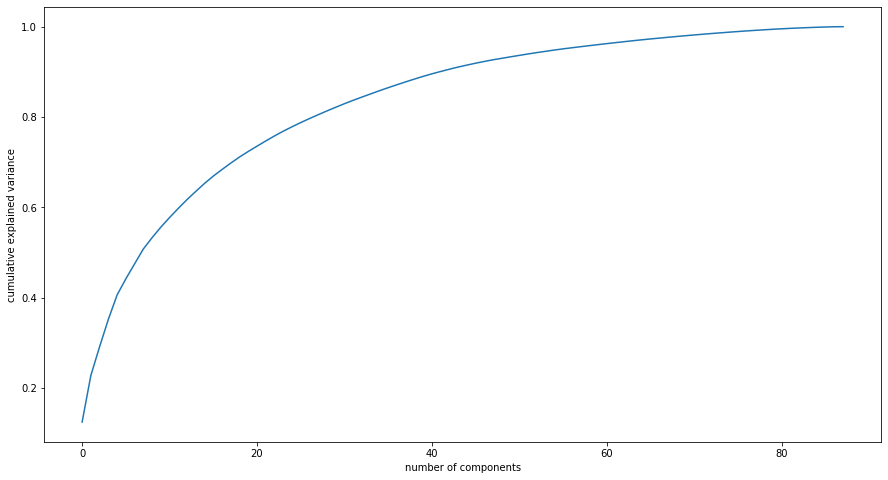

In [50]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [51]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 40)

### Correlation matrix

In [52]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())


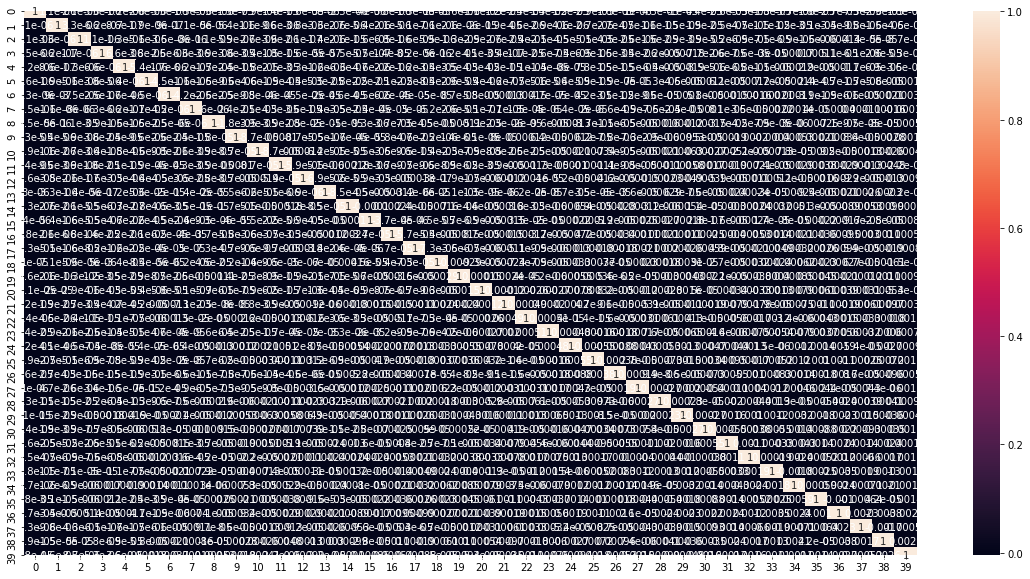

In [53]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [54]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0025701508709741077 , min corr:  -0.0037660507339130067


In [55]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 40)

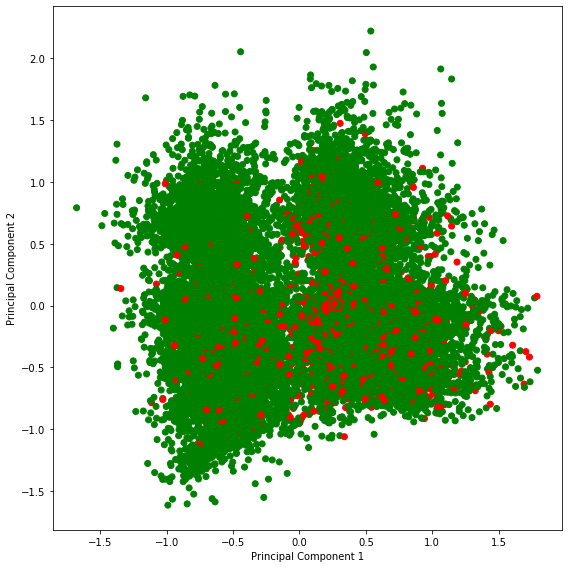

In [56]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### LogisticRegression model with PCA


In [57]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [58]:

pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [59]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [60]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6705 1546]
 [ 135  615]]
0.8132429730029996


In [61]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8802718054377249


## ROC Curve

In [63]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

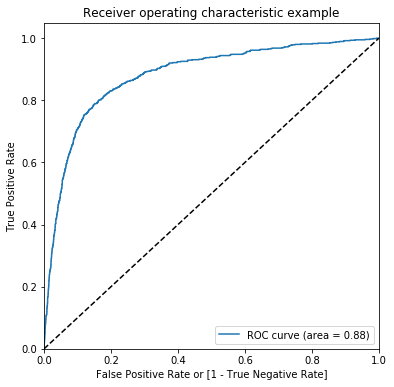

(array([0.00000000e+00, 0.00000000e+00, 1.21197431e-04, ...,
        9.99757605e-01, 9.99878803e-01, 1.00000000e+00]),
 array([0.        , 0.00133333, 0.00133333, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99641977e+00, 9.96419770e-01, 9.95991246e-01, ...,
        4.10106483e-05, 1.84406197e-05, 1.09349606e-05]))

In [64]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [65]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.702734,1,1,1,1,1,1,1,1,0,0
1,1,0.421268,1,1,1,1,1,0,0,0,0,0
2,0,0.245843,1,1,1,0,0,0,0,0,0,0
3,0,0.211198,1,1,1,0,0,0,0,0,0,0
4,1,0.662580,1,1,1,1,1,1,1,0,0,0


- Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [66]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.357405  0.301903  0.968000
0.2   0.2  0.525608  0.488062  0.938667
0.3   0.3  0.657594  0.634590  0.910667
0.4   0.4  0.746806  0.736153  0.864000
0.5   0.5  0.813243  0.812629  0.820000
0.6   0.6  0.859682  0.868380  0.764000
0.7   0.7  0.891457  0.911162  0.674667
0.8   0.8  0.912010  0.948491  0.510667
0.9   0.9  0.920342  0.980366  0.260000


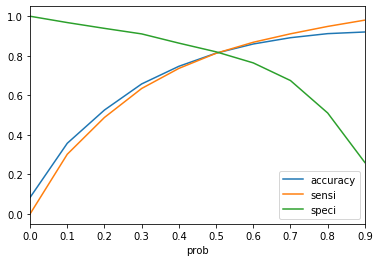

In [67]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [68]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.509808509746484]


- Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [69]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8251
1     750
Name: churn, dtype: int64

### Confusion matrix 

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6663, 1588],
       [ 132,  618]])

### Logistic Regression model matrics wit PCA 

In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.8132429730029996
Sensitivity:  0.824
Specificity:  0.8075384801842201
false postive rate:  0.1924615198157799
positive predictive value:  0.28014505893019037
Negative predictive value:  0.9805739514348786
Misclassification Rate:  0.1910898789023442


## LogistcRegression model with RFE


In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 40 variables as output as PCA gave 40
rfe = rfe.fit(X_norm,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True  True False False False False False False False False False
  True False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False  True False False False False False  True False False False False
 False False False False False False  True  True False False False False
 False  True False False  True False False  True False False  True False
 False False False False False  True False False False False False False
 False False False False]
[ 1  1  1  6 37  5 74 38 16 17 71 41  1  4  1 62 12 70 48 57 46 47 33  8
  7 36 42 58  1 67 56 27 55 53 54 49 26  1 11 21 10 32 66  1 61 68 24 28
 13 14 73 63 30 45  1  1 22 18 69 40 20  1 64 19  1 65 31  1 23 51  1 25
 50  2 39 15  9  1 35 72 43 52  3 44 59 60 34 29]


In [73]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_t2m_mou_6',
       'isd_og_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8',
       'total_rech_num_7', 'total_rech_num_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'aug_vbc_3g'],
      dtype='object')

In [74]:
import statsmodels.api as sm
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### Correlation matrix

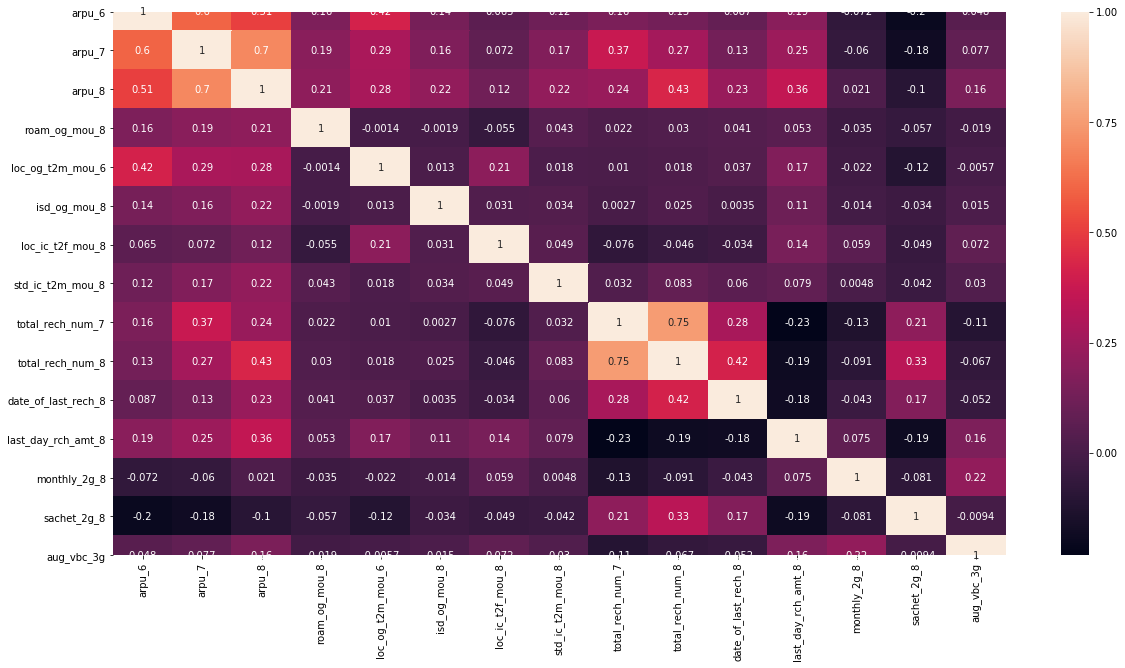

In [75]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_norm[col].corr(),annot = True)

### VIF value

In [76]:
col_for_vif = list(col)
col_for_vif.append('churn')
# telecom_df4.head()
vif_cal(input_data=telecom_df4[col_for_vif], dependent_col='churn')

,Var,Vif
1,arpu_7,10.04
2,arpu_8,9.59
9,total_rech_num_8,9.30
8,total_rech_num_7,8.85
10,date_of_last_rech_8,6.37
0,arpu_6,5.94
11,last_day_rch_amt_8,2.21
4,loc_og_t2m_mou_6,2.04
13,sachet_2g_8,1.54
14,aug_vbc_3g,1.34


- VIF looks good now will select these coloum for creating LogisticRegression

In [77]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### ROC_AUC score

In [78]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [79]:

#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [80]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8251
           1       0.28      0.83      0.42       750

    accuracy                           0.81      9001
   macro avg       0.63      0.82      0.65      9001
weighted avg       0.92      0.81      0.84      9001

[[6629 1622]
 [ 126  624]]
accuracy_score :  0.8057993556271525


In [81]:

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [82]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8789103543004888


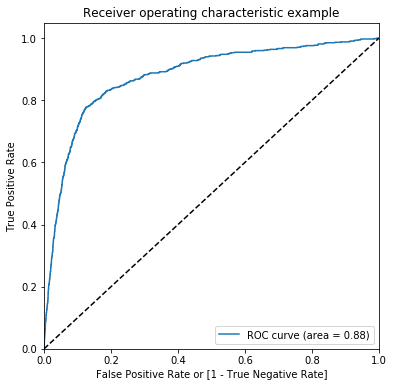

(array([0.00000000e+00, 0.00000000e+00, 1.21197431e-04, ...,
        9.99757605e-01, 9.99878803e-01, 1.00000000e+00]),
 array([0.        , 0.00133333, 0.00133333, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99225636e+00, 9.92256363e-01, 9.91343655e-01, ...,
        7.82145434e-05, 4.60258662e-05, 1.20833748e-05]))

In [83]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()


,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.732742,1,1,1,1,1,1,1,1,0,0
1,1,0.592814,1,1,1,1,1,1,0,0,0,0
2,0,0.140528,1,1,0,0,0,0,0,0,0,0
3,0,0.212563,1,1,1,0,0,0,0,0,0,0
4,1,0.873398,1,1,1,1,1,1,1,1,1,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.083324     0.980366         0.26
0.1   0.1  0.341073     0.980366         0.26
0.2   0.2  0.508943     0.980366         0.26
0.3   0.3  0.631485     0.980366         0.26
0.4   0.4  0.733363     0.980366         0.26
0.5   0.5  0.805799     0.980366         0.26
0.6   0.6  0.859016     0.980366         0.26
0.7   0.7  0.894123     0.980366         0.26
0.8   0.8  0.914676     0.980366         0.26
0.9   0.9  0.920564     0.980366         0.26


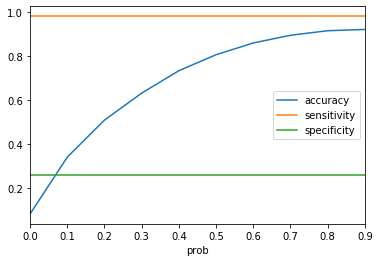

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [87]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5262717471103564]


In [88]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()


0    8251
1     750
Name: churn, dtype: int64

In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6571, 1680],
       [ 121,  629]])

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8057993556271525
Sensitivity:  0.8386666666666667
Specificity:  0.7963883165676887
false postive rate:  0.20361168343231123
positive predictive value:  0.27241229969683844
Negative predictive value:  0.9819187089061566


## DecisionTreeClassifier With PCA

In [91]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      8251
           1       0.20      0.68      0.31       750

    accuracy                           0.75      9001
   macro avg       0.58      0.72      0.58      9001
weighted avg       0.90      0.75      0.80      9001

[[6208 2043]
 [ 240  510]]
Acuracy Score 0.7463615153871792


In [93]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.7463615153871792
Sensitivity:  0.68
Specificity:  0.7523936492546358
false postive rate:  0.2476063507453642
positive predictive value:  0.199764982373678
Negative predictive value:  0.9627791563275434
Misclassification Rate:  0.2536384846128208


## Hyperparameter tuning

In [94]:
########## lets tune hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [95]:
y_train.shape

(21000,)

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096709,0.002884,0.001262,0.000091,1,{'max_depth': 1},0.785051,0.769524,0.774286,0.775238,0.499643,0.720762,0.110658,35,0.775463,0.767262,0.778155,0.777857,0.510922,0.721932,0.105579
1,0.181723,0.006745,0.001252,0.000037,2,{'max_depth': 2},0.430850,0.415000,0.418333,0.417381,0.602286,0.456762,0.072960,39,0.420263,0.410536,0.417143,0.418214,0.613416,0.455914,0.078818
2,0.262225,0.005536,0.001408,0.000153,3,{'max_depth': 3},0.599381,0.616905,0.598333,0.587619,0.626340,0.605714,0.013947,38,0.583368,0.616429,0.617083,0.590536,0.634843,0.608452,0.018893
3,0.324162,0.006512,0.001321,0.000119,4,{'max_depth': 4},0.726970,0.700952,0.705714,0.632619,0.616099,0.676476,0.043754,37,0.722245,0.707381,0.722619,0.634940,0.623832,0.682204,0.043616
4,0.403504,0.008342,0.001490,0.000253,5,{'max_depth': 5},0.744347,0.705476,0.646429,0.743810,0.661824,0.700381,0.040602,36,0.741235,0.722619,0.660357,0.752262,0.675912,0.710477,0.036183


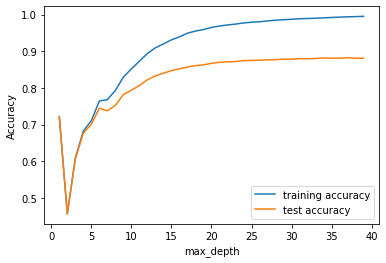

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [98]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.842222,0.041217,0.001570,0.000080,5,{'min_samples_leaf': 5},0.838848,0.838571,0.839762,0.850000,0.844725,0.842381,0.004414,1,0.940115,0.938929,0.939702,0.944048,0.940063,0.940571,0.001789
1,0.814431,0.080695,0.001746,0.000296,25,{'min_samples_leaf': 25},0.788860,0.770952,0.794286,0.782381,0.772327,0.781762,0.009094,2,0.837312,0.827500,0.838333,0.828274,0.829713,0.832226,0.004635
2,0.731714,0.061937,0.001631,0.000246,45,{'min_samples_leaf': 45},0.772435,0.724524,0.745000,0.744048,0.752798,0.747762,0.015464,3,0.801476,0.775714,0.787917,0.776190,0.789536,0.786167,0.009566
3,0.692213,0.120891,0.001675,0.000155,65,{'min_samples_leaf': 65},0.761485,0.728810,0.732143,0.744048,0.743510,0.742000,0.011466,4,0.783023,0.773452,0.768452,0.768452,0.773466,0.773369,0.005321
4,0.599613,0.035346,0.001487,0.000122,85,{'min_samples_leaf': 85},0.743394,0.726429,0.720714,0.756667,0.729459,0.735333,0.013020,7,0.758795,0.766429,0.756607,0.776012,0.750729,0.761714,0.008740


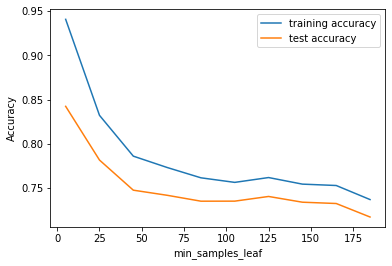

In [100]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [101]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.130703,0.319642,0.001829,0.000196,5,{'min_samples_split': 5},0.885027,0.875000,0.876905,0.881429,0.877590,0.879190,0.003590,1,0.995238,0.995119,0.994702,0.995417,0.995596,0.995214,0.000303
1,0.885128,0.068259,0.001601,0.000075,25,{'min_samples_split': 25},0.839800,0.825238,0.834762,0.839048,0.829721,0.833714,0.005556,2,0.928567,0.928214,0.937560,0.928631,0.931552,0.930905,0.003538
2,0.800876,0.027174,0.001810,0.000173,45,{'min_samples_split': 45},0.805999,0.796429,0.807381,0.805000,0.802810,0.803524,0.003848,3,0.884517,0.885417,0.886131,0.883214,0.885840,0.885024,0.001056
3,0.774211,0.018779,0.001603,0.000117,65,{'min_samples_split': 65},0.798143,0.778571,0.790476,0.784048,0.785187,0.787286,0.006617,4,0.864813,0.853869,0.857024,0.850536,0.857687,0.856786,0.004751
4,0.749041,0.028249,0.001739,0.000317,85,{'min_samples_split': 85},0.778624,0.754524,0.772857,0.774524,0.763039,0.768714,0.008749,5,0.835169,0.825833,0.835119,0.831548,0.830427,0.831619,0.003457


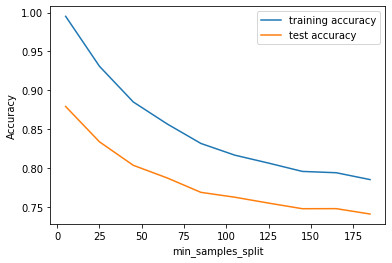

In [103]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [104]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score', return_train_score=True,
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  9.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [105]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.987587,0.033156,0.002459,0.000396,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727446,0.70381,0.655952,0.742381,0.741843,0.714286,0.032355,211,0.731829,0.719643,0.66619,0.751667,0.757455,0.725357,0.032551
1,0.954872,0.021333,0.002335,0.000342,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727446,0.70381,0.655952,0.742381,0.741843,0.714286,0.032355,211,0.731829,0.719643,0.66619,0.751667,0.757455,0.725357,0.032551
2,0.953095,0.044194,0.004317,0.002726,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727446,0.70381,0.655952,0.742381,0.741843,0.714286,0.032355,211,0.731829,0.719643,0.66619,0.751667,0.757455,0.725357,0.032551
3,0.919007,0.019675,0.002302,0.000419,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727922,0.70381,0.655952,0.742381,0.741843,0.714381,0.032395,210,0.731829,0.719643,0.66619,0.751667,0.757455,0.725357,0.032551
4,0.953404,0.040241,0.001891,0.000107,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.727922,0.70381,0.655952,0.741190,0.739938,0.713762,0.031871,215,0.731829,0.719643,0.66619,0.750417,0.754836,0.724583,0.031841


In [106]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7832857142857143
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [107]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [108]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6624, 1627],
       [ 261,  489]])

In [109]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.652
Specificity:  0.8028117803902557
false postive rate:  0.19718821960974428
positive predictive value:  0.23109640831758035
Negative predictive value:  0.9620915032679739
Misclassification Rate:  0.20975447172536385


## RandomForestClassifier with PCA

In [110]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [111]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8201,   50],
       [ 680,   70]])

In [112]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.09333333333333334
Specificity:  0.9939401284692765
false postive rate:  0.006059871530723549
positive predictive value:  0.5833333333333334
Negative predictive value:  0.9234320459407724
Misclassification Rate:  0.0811020997666926


### Hyperparameter tuning for RandomForest

In [113]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                          return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [114]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.480960,0.009787,0.014514,0.002211,2,{'max_depth': 2},0.743394,0.739048,0.721190,0.746905,0.720648,0.734238,0.011156,4,0.734032,0.738929,0.736190,0.744583,0.716207,0.733988,0.009567
1,1.283974,0.118863,0.013397,0.002649,7,{'max_depth': 7},0.859557,0.843095,0.860476,0.848095,0.851631,0.852571,0.006664,3,0.877850,0.875833,0.888631,0.865655,0.872270,0.876048,0.007536
2,1.493733,0.110186,0.015911,0.002093,12,{'max_depth': 12},0.918591,0.899048,0.900000,0.913571,0.908073,0.907857,0.007580,2,0.963986,0.963988,0.960952,0.964286,0.960300,0.962702,0.001711
3,1.922955,0.161703,0.013739,0.005767,17,{'max_depth': 17},0.924066,0.916667,0.913810,0.920476,0.916409,0.918286,0.003589,1,0.982618,0.982262,0.981131,0.981667,0.981846,0.981905,0.000509


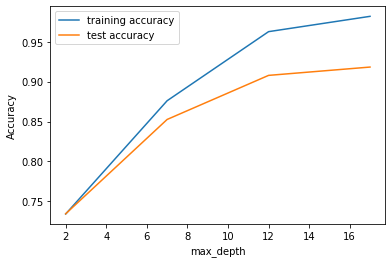

In [115]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [116]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.975508,0.204089,0.115188,0.024199,100,{'n_estimators': 100},0.917877,0.900476,0.902857,0.905238,0.908550,0.907000,0.006059,4,0.955235,0.955655,0.956786,0.953274,0.955895,0.955369,0.001164
1,60.170942,0.777432,0.499919,0.040702,500,{'n_estimators': 500},0.917163,0.900238,0.903571,0.906905,0.909979,0.907571,0.005797,3,0.956843,0.955357,0.958036,0.954048,0.956729,0.956202,0.001372
2,109.644712,1.155421,0.903189,0.083326,900,{'n_estimators': 900},0.917401,0.901429,0.905952,0.906667,0.909502,0.908190,0.005284,2,0.956962,0.956429,0.958571,0.953393,0.956253,0.956321,0.001677
3,163.219325,16.489970,1.613782,0.757186,1300,{'n_estimators': 1300},0.918591,0.902857,0.904524,0.907857,0.909026,0.908571,0.005480,1,0.956724,0.957024,0.957679,0.953690,0.956669,0.956357,0.001381


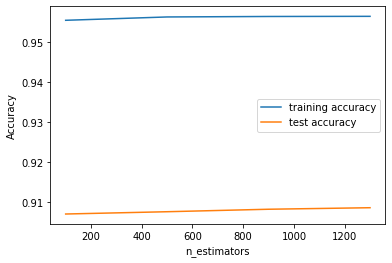

In [118]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [119]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.101821,0.246296,0.016036,0.004415,4,{'max_features': 4},0.897881,0.890238,0.896667,0.888333,0.890688,0.892762,0.003788,4,0.940711,0.940952,0.943988,0.928393,0.937682,0.938345,0.005361
1,3.501876,0.179673,0.037301,0.008303,8,{'max_features': 8},0.908117,0.880714,0.889762,0.903571,0.894261,0.895286,0.009770,1,0.942080,0.935714,0.939405,0.938155,0.935778,0.938226,0.002390
2,6.070990,0.216250,0.023756,0.008378,14,{'max_features': 14},0.909783,0.887619,0.889762,0.897381,0.891165,0.895143,0.008010,2,0.941008,0.942321,0.937440,0.940000,0.938099,0.939774,0.001806
3,6.258803,0.719999,0.020964,0.008096,20,{'max_features': 20},0.899786,0.887381,0.893571,0.892143,0.893308,0.893238,0.003962,3,0.937258,0.939167,0.941429,0.935893,0.938575,0.938464,0.001863
4,7.815426,1.625420,0.027218,0.027817,24,{'max_features': 24},0.900500,0.886905,0.889762,0.899524,0.886640,0.892667,0.006105,5,0.940651,0.932440,0.941964,0.939107,0.938456,0.938524,0.003278


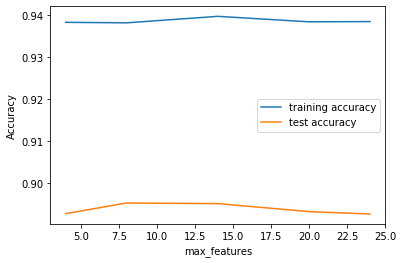

In [121]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 10

In [122]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.299012,0.166862,0.016798,0.004768,100,{'min_samples_leaf': 100},0.836944,0.827381,0.830476,0.831667,0.824244,0.830143,0.004269,1,0.844753,0.857202,0.854107,0.847083,0.844176,0.849464,0.005240
1,1.382065,0.125009,0.020905,0.005683,150,{'min_samples_leaf': 150},0.835277,0.802857,0.802143,0.814048,0.826625,0.816190,0.013061,2,0.836002,0.821250,0.829107,0.828929,0.841498,0.831357,0.006892
2,1.185758,0.042297,0.019629,0.007065,200,{'min_samples_leaf': 200},0.819329,0.798571,0.810238,0.810714,0.805192,0.808810,0.006845,3,0.825525,0.821131,0.830000,0.817976,0.817213,0.822369,0.004808
3,1.076787,0.063032,0.024865,0.007557,250,{'min_samples_leaf': 250},0.809093,0.782857,0.793333,0.800476,0.809478,0.799048,0.010065,4,0.806774,0.805238,0.812798,0.810476,0.810190,0.809095,0.002723
4,1.399793,0.247150,0.017092,0.006856,300,{'min_samples_leaf': 300},0.790050,0.788571,0.788095,0.799048,0.781615,0.789476,0.005594,5,0.788856,0.804405,0.805774,0.807976,0.786322,0.798667,0.009151


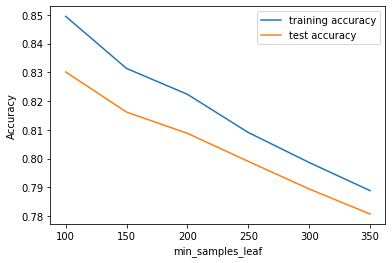

In [124]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [125]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [126]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.629427,0.021650,0.006879,0.000349,200,{'min_samples_split': 200},0.849322,0.848571,0.852857,0.856190,0.854727,0.852333,0.002970,1,0.872671,0.887262,0.885238,0.879226,0.882567,0.881393,0.005126
1,0.615536,0.057541,0.006279,0.000190,250,{'min_samples_split': 250},0.856463,0.843333,0.831905,0.836429,0.850917,0.843810,0.009023,2,0.873326,0.871964,0.865000,0.863333,0.870782,0.868881,0.003968
2,0.586348,0.028768,0.006587,0.000401,300,{'min_samples_split': 300},0.845513,0.834762,0.828810,0.843333,0.841391,0.838762,0.006139,3,0.855468,0.863690,0.859226,0.860060,0.856259,0.858940,0.002938
3,0.555037,0.015414,0.006349,0.000280,350,{'min_samples_split': 350},0.835991,0.828810,0.827619,0.830476,0.828292,0.830238,0.003028,4,0.845705,0.858750,0.859821,0.853393,0.845188,0.852571,0.006214
4,0.599896,0.066527,0.006106,0.000518,400,{'min_samples_split': 400},0.832183,0.818095,0.810714,0.823810,0.833294,0.823619,0.008532,5,0.842193,0.846429,0.839048,0.840357,0.843581,0.842321,0.002571


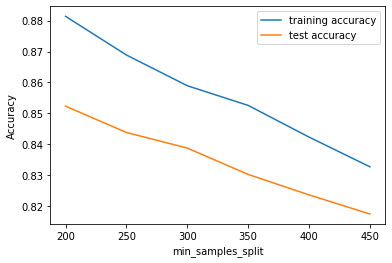

In [127]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [129]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 25.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [130]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8533809523809524 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [131]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [132]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [133]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [134]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8251
           1       0.33      0.71      0.45       750

    accuracy                           0.86      9001
   macro avg       0.65      0.79      0.68      9001
weighted avg       0.92      0.86      0.88      9001

[[7182 1069]
 [ 220  530]]
accuracy_score:   0.8567936895900455


In [135]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7182, 1069],
       [ 220,  530]])

In [136]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8567936895900455
Sensitivity:  0.7066666666666667
Specificity:  0.8704399466731305
false postive rate:  0.12956005332686946
positive predictive value:  0.3314571607254534
Negative predictive value:  0.9702783031613078
Misclassification Rate:  0.14320631040995446


## RandomForest on all feature

In [137]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [138]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [139]:
# Making predictions
predictions = rfc.predict(X_test)

In [140]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.77      0.37      0.50       750

    accuracy                           0.94      9001
   macro avg       0.86      0.68      0.73      9001
weighted avg       0.93      0.94      0.93      9001

[[8170   81]
 [ 474  276]]
0.9383401844239528


In [141]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[8170,   81],
       [ 474,  276]])

In [142]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.9383401844239528
Sensitivity:  0.368
Specificity:  0.9901830081202279
false postive rate:  0.009816991879772148
positive predictive value:  0.773109243697479
Negative predictive value:  0.9451642757982416
Misclassification Rate:  0.061659815576047106


## Hyperparameter Tuning 

In [143]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)


In [144]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [145]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.259475,0.028665,0.009510,0.001165,2,{'max_depth': 2},0.864794,0.845714,0.857619,0.874048,0.854727,0.859381,0.009549,4,0.857194,0.854881,0.860417,0.868512,0.855723,0.859345,0.004957
1,0.629213,0.061203,0.013802,0.002463,7,{'max_depth': 7},0.917639,0.896667,0.906667,0.900952,0.904025,0.905190,0.007059,3,0.922793,0.917976,0.918274,0.914762,0.919886,0.918738,0.002622
2,0.914222,0.044815,0.015563,0.000521,12,{'max_depth': 12},0.935254,0.927857,0.937143,0.936429,0.932127,0.933762,0.003415,2,0.969522,0.970833,0.969226,0.965655,0.968573,0.968762,0.001719
3,0.814105,0.141180,0.014184,0.002821,17,{'max_depth': 17},0.944299,0.930952,0.938571,0.948333,0.939271,0.940286,0.005864,1,0.982023,0.982440,0.981845,0.980119,0.983632,0.982012,0.001133


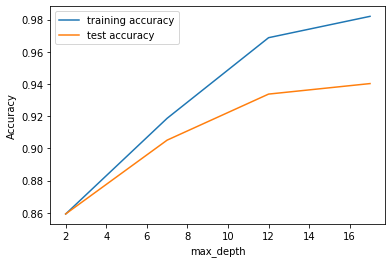

In [146]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#10,12

In [147]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [148]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.345949,0.082052,0.119572,0.009620,100,{'n_estimators': 100},0.933825,0.921190,0.931190,0.936905,0.928793,0.930381,0.005330,3,0.959462,0.962857,0.961012,0.958571,0.959526,0.960286,0.001506
1,36.658957,1.023722,0.631813,0.124034,500,{'n_estimators': 500},0.935015,0.921905,0.931429,0.936429,0.928793,0.930714,0.005157,1,0.960414,0.963155,0.961310,0.960298,0.960776,0.961190,0.001043
2,60.461423,11.546582,0.859941,0.290551,900,{'n_estimators': 900},0.934301,0.921429,0.930000,0.937619,0.928793,0.930429,0.005488,2,0.959462,0.962560,0.961905,0.959762,0.961848,0.961107,0.001250


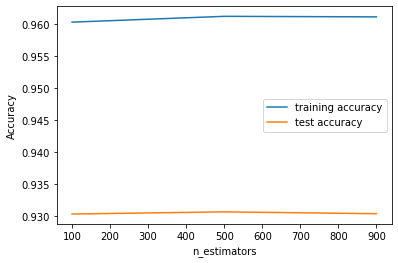

In [149]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [150]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [151]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.273727,0.011610,0.013855,0.004849,4,{'max_features': 4},0.923352,0.911190,0.918810,0.926905,0.920695,0.920190,0.005258,5,0.944937,0.947024,0.946786,0.946250,0.946194,0.946238,0.000723
1,0.422853,0.007001,0.011227,0.001698,8,{'max_features': 8},0.926446,0.915476,0.925476,0.929286,0.922124,0.923762,0.004733,4,0.950771,0.954286,0.951310,0.950536,0.950539,0.951488,0.001427
2,0.820837,0.081219,0.011584,0.002970,14,{'max_features': 14},0.932635,0.911905,0.923810,0.933571,0.921648,0.924714,0.007944,3,0.953807,0.953631,0.952202,0.957024,0.949765,0.953286,0.002364
3,1.492800,0.429761,0.013094,0.000781,20,{'max_features': 20},0.928588,0.918333,0.925000,0.937143,0.926411,0.927095,0.006080,1,0.956188,0.958988,0.954762,0.958571,0.956491,0.957000,0.001572
4,1.136420,0.172804,0.008758,0.000949,24,{'max_features': 24},0.929541,0.917619,0.925952,0.931190,0.924982,0.925857,0.004704,2,0.955354,0.957917,0.958452,0.957857,0.958693,0.957655,0.001193


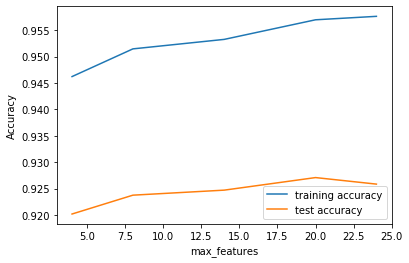

In [152]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [153]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.338452,0.005050,0.007275,0.000224,100,{'min_samples_leaf': 100},0.879076,0.871905,0.892857,0.881667,0.875923,0.880286,0.007081,1,0.881957,0.891250,0.897024,0.884405,0.884233,0.887774,0.005574
1,0.309976,0.003957,0.006666,0.000207,150,{'min_samples_leaf': 150},0.880267,0.870952,0.882857,0.886667,0.871636,0.878476,0.006211,2,0.883624,0.887619,0.887202,0.884762,0.876079,0.883857,0.004165
2,0.306928,0.043673,0.006923,0.000376,200,{'min_samples_leaf': 200},0.885027,0.874524,0.882857,0.868095,0.872112,0.876524,0.006433,4,0.885827,0.886845,0.890952,0.875238,0.873519,0.882476,0.006852
3,0.273790,0.006759,0.006540,0.000169,250,{'min_samples_leaf': 250},0.883599,0.875238,0.871429,0.878095,0.874494,0.876571,0.004105,3,0.883981,0.886190,0.870833,0.885833,0.881317,0.881631,0.005669
4,0.265807,0.006406,0.006572,0.000452,300,{'min_samples_leaf': 300},0.875506,0.870000,0.884524,0.882857,0.848774,0.872333,0.012883,6,0.871242,0.876905,0.889286,0.874702,0.857092,0.873845,0.010353


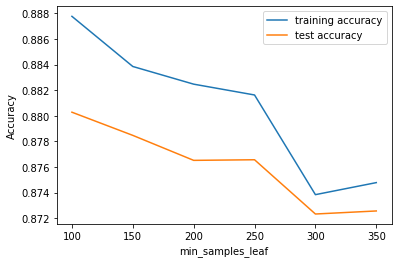

In [155]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [156]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [157]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.432309,0.008011,0.008586,0.000242,100,{'min_samples_split': 100},0.917877,0.905714,0.914048,0.909048,0.908788,0.911095,0.004317,1,0.930948,0.932619,0.933274,0.924286,0.926790,0.929583,0.003480
1,0.450805,0.045322,0.007731,0.000261,150,{'min_samples_split': 150},0.903594,0.889524,0.898810,0.901190,0.895451,0.897714,0.004900,3,0.914697,0.914167,0.914940,0.914702,0.913398,0.914381,0.000553
2,0.407616,0.004701,0.007538,0.000252,200,{'min_samples_split': 200},0.898358,0.897381,0.896429,0.904048,0.893308,0.897905,0.003508,2,0.904220,0.919226,0.908214,0.910119,0.906732,0.909702,0.005137
3,0.386568,0.016459,0.007362,0.000273,250,{'min_samples_split': 250},0.896215,0.880714,0.895000,0.889762,0.882829,0.888905,0.006250,4,0.901125,0.903750,0.903810,0.897143,0.891256,0.899417,0.004749
4,0.396168,0.040825,0.007394,0.000390,300,{'min_samples_split': 300},0.884789,0.879762,0.896667,0.902143,0.879971,0.888667,0.009116,5,0.898149,0.900000,0.903690,0.900417,0.890959,0.898643,0.004237


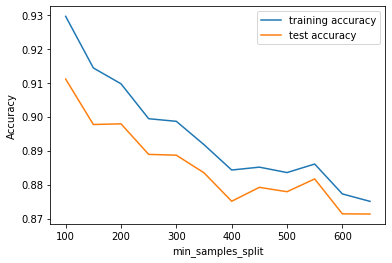

In [158]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [159]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'max_depth': [7,8,10,12],
#     'min_samples_leaf': range(180, 250, 50),
#     'min_samples_split': range(200, 400, 100),
#     'n_estimators': [300,400,500,600], 
#     'max_features': [10, 15, 20]
# }

# Tried with the above parameters the running time was 4hrs
#choose the below parameters for saving the running time
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1)

In [160]:
# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 19.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [161]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8812380952380953 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 400}


In [162]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=150, 
                             min_samples_split=300,
                             max_features=15,
                             n_estimators=500)

In [163]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=150,
                       min_samples_split=300, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [164]:
# predict
predictions = rfc_final.predict(X_test)

In [165]:
from sklearn import metrics
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7404,  847],
       [ 147,  603]])

In [166]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8895678257971337
Sensitivity:  0.804
Specificity:  0.897345776269543
false postive rate:  0.10265422373045692
positive predictive value:  0.41586206896551725
Negative predictive value:  0.9805323798172427
Misclassification Rate:  0.11043217420286634


In [167]:
#Important Variables
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [168]:
telecom_df5.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mo

In [169]:
#Variable Importance top 30 variable
dic= dict(d_descending)

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=15
n_items = take(n, dic.items())

In [170]:
print('These are top 15 driver variable: ',n_items)

These are top 15 driver variable:  [('last_day_rch_amt_8', 0.15402443223924386), ('arpu_8', 0.12531406560911343), ('max_rech_amt_8', 0.08833161224067758), ('total_rech_data_amt_8', 0.0737132401885421), ('roam_og_mou_8', 0.0680604998254516), ('loc_ic_t2f_mou_8', 0.05754092611054943), ('date_of_last_rech_8', 0.05515142522653016), ('loc_og_t2f_mou_8', 0.05468812302000897), ('roam_ic_mou_8', 0.0510415719560056), ('total_rech_num_8', 0.035434509269960876), ('offnet_mou_8', 0.029561600502103352), ('std_ic_t2m_mou_8', 0.026587856739069864), ('std_ic_t2t_mou_8', 0.015516739568377841), ('spl_og_mou_8', 0.015465665190531002), ('aug_vbc_3g', 0.009272865146364705)]


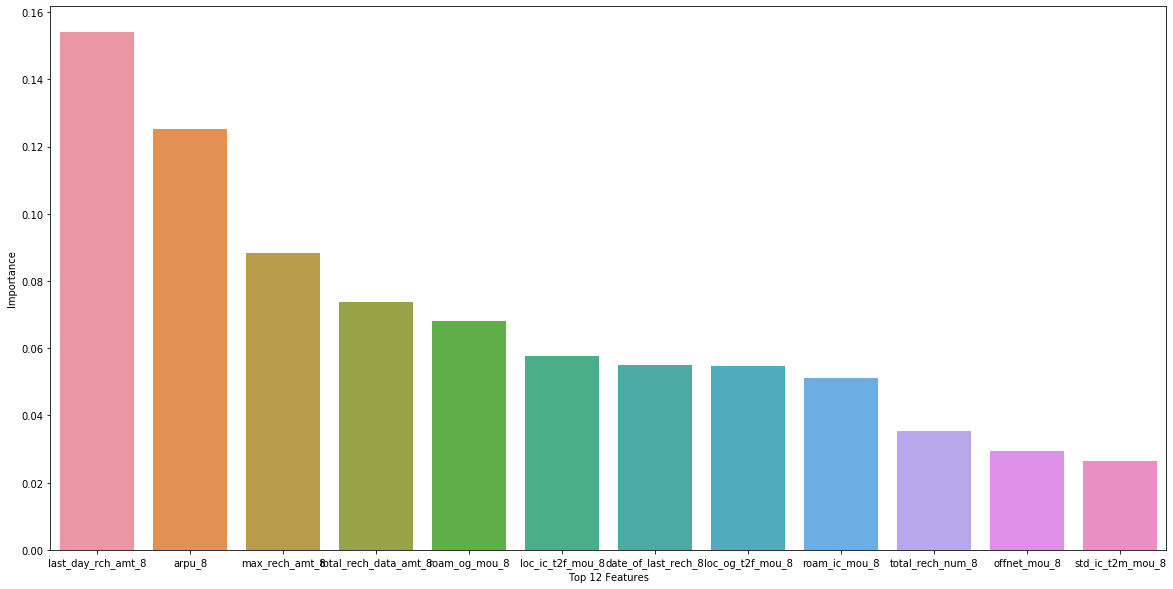

In [171]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

### Driver Variables of Random Forest

- 15 driver variable:  'last_day_rch_amt_8','arpu_8','max_rech_amt_8', 'total_rech_data_amt_8', roam_og_mou_8',loc_ic_t2f_mou_8', date_of_last_rech_8','loc_og_t2f_mou_8', 'roam_ic_mou_8', total_rech_num_8',offnet_mou_8','std_ic_t2m_mou_8','spl_og_mou_8','std_ic_t2t_mou_8', 'aug_vbc_3g' 


### Driver Variables of Logistic regression with RFE

- 15 driver variables : 'arpu_6', 'arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_t2m_mou_6','isd_og_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'aug_vbc_3g'

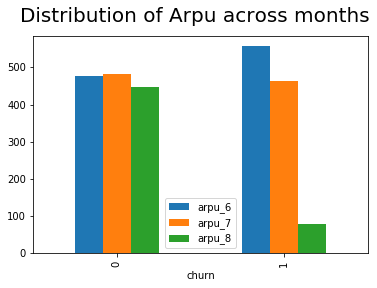

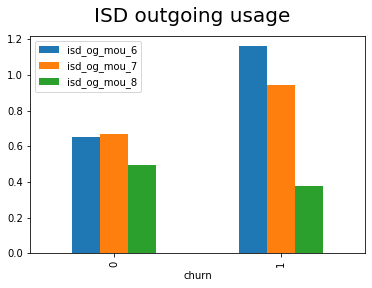

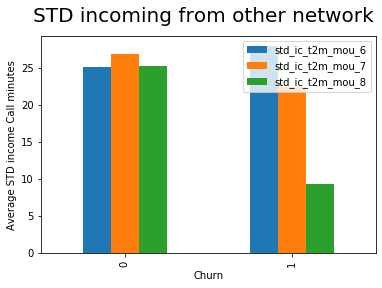

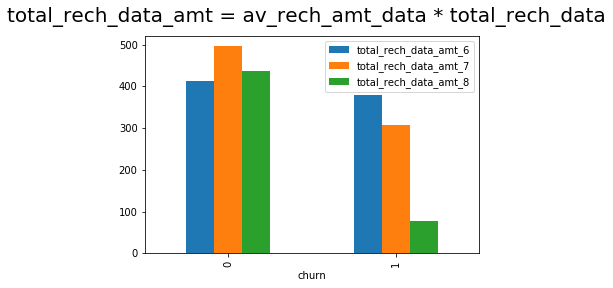

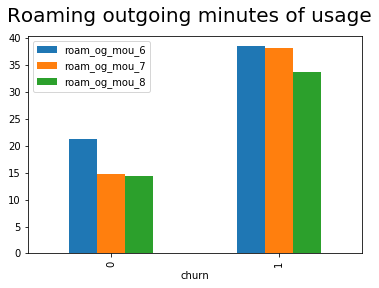

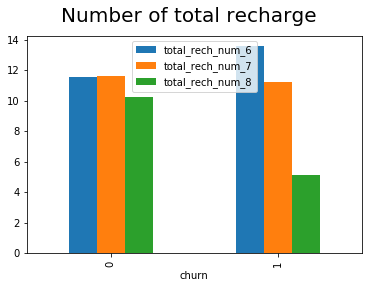

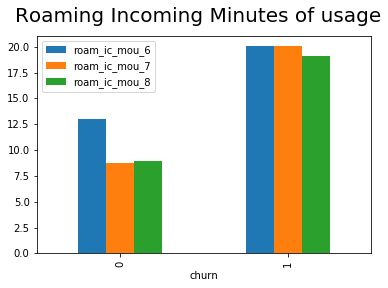

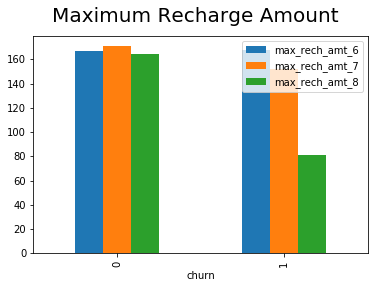

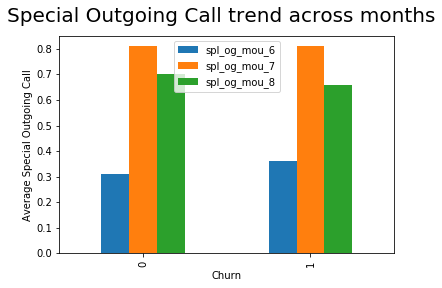

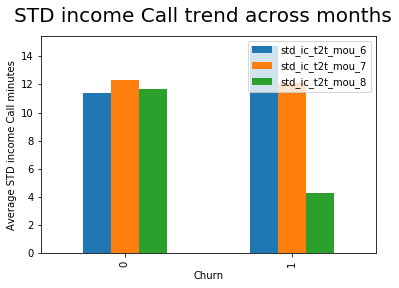

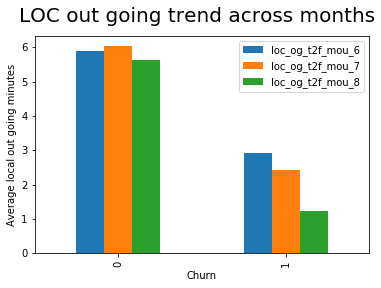

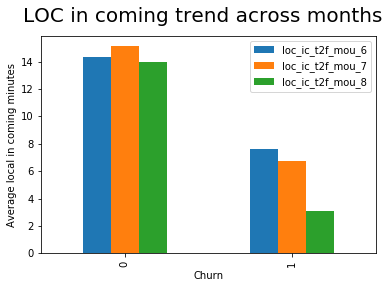

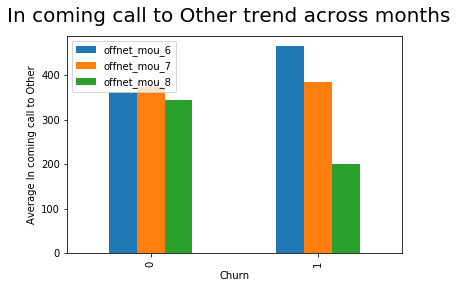

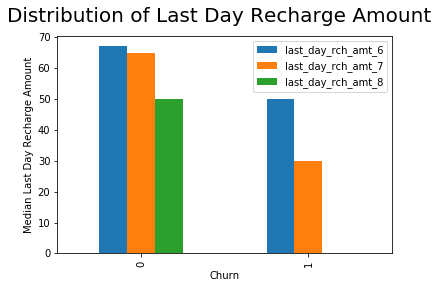

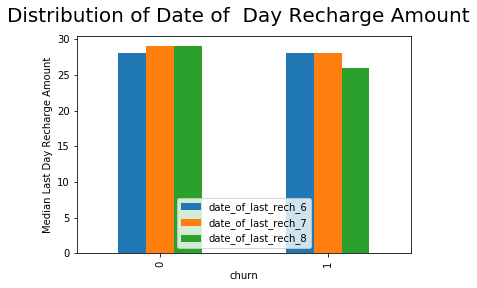

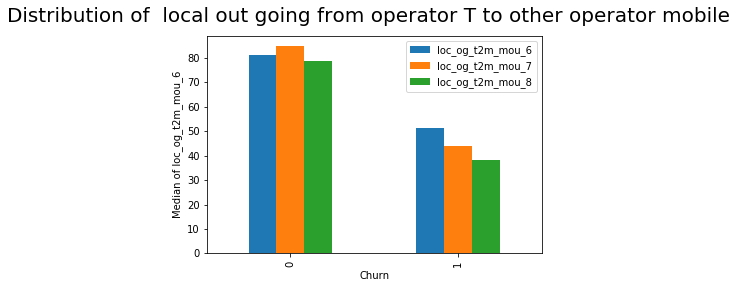

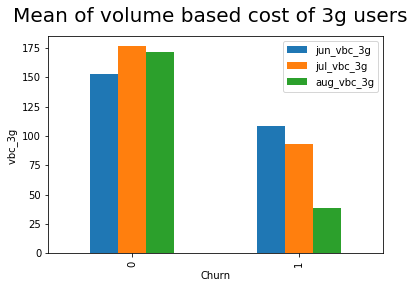

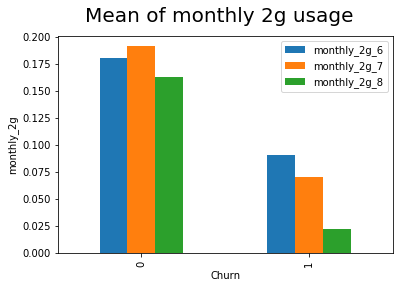

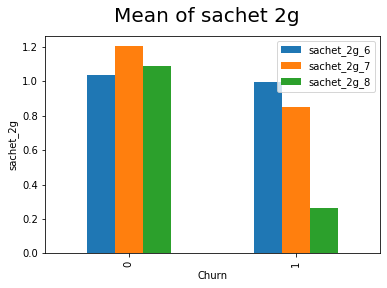

In [203]:
telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('ISD outgoing usage', fontsize=20)
plt.show()


df_sample = telecom_df2.groupby(['churn'])['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD incoming from other network', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call minutes")
plt.show()

df_sample = telecom_df2.groupby(['churn'])['total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('total_rech_data_amt = av_rech_amt_data * total_rech_data', fontsize=20)
plt.show()

df_sample = telecom_df2.groupby(['churn'])['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Roaming outgoing minutes of usage', fontsize=20)
plt.show()

df_sample = telecom_df2.groupby(['churn'])['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'].mean()
df_sample.plot.bar()
plt.suptitle('Number of total recharge', fontsize=20)
plt.show()


df_sample = telecom_df2.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Roaming Incoming Minutes of usage', fontsize=20)
plt.show()

df_sample = telecom_df2.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = telecom_df2.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = telecom_df2.groupby(['churn'])['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call minutes")
plt.show()


df_sample = telecom_df2.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average local out going minutes")
plt.show()

df_sample = telecom_df2.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average local in coming minutes")
plt.show()

df_sample = telecom_df2.groupby(['churn'])['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Date of  Day Recharge Amount', fontsize=20)
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of  local out going from operator T to other operator mobile', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median of loc_og_t2m_mou_6")
plt.show()


telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g'].mean()
df_sample.plot.bar()
plt.suptitle('Mean of volume based cost of 3g users', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("vbc_3g ")
plt.show()

count_rech_2g =['monthly_2g_6','monthly_2g_7','monthly_2g_8']

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['monthly_2g_6','monthly_2g_7','monthly_2g_8'].mean()
df_sample.plot.bar()
plt.suptitle('Mean of monthly 2g usage', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("monthly_2g")
plt.show()

count_rech_2g =['sachet_2g_6','sachet_2g_7','sachet_2g_8']

telecom_df2['churn'] = telecom_df2['churn'].astype('object', copy = False)
df_sample = telecom_df2.groupby(['churn'])['sachet_2g_6','sachet_2g_7','sachet_2g_8'].mean()
df_sample.plot.bar()
plt.suptitle('Mean of sachet 2g', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("sachet_2g")
plt.show()


#### Further analysis on day of the last recharge

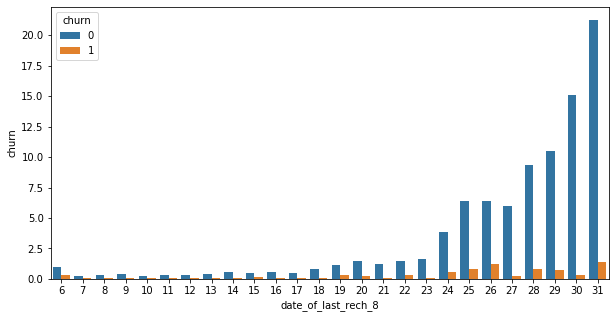

In [174]:

plt.figure(figsize=(10,5))

sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_df4,  
            estimator=lambda x: len(x) / len(telecom_df4) * 100)

### Metric table for all models is below:


| Model | Accuracy | Sensitivity/Recall |specificity
| --- | --- | --- |--- |
| Logistic regression with PCA |0.81 | 0.82 |0.80|
| Logistic regression with RFE |0.80| 0.83 |0.79|
| Decision Tree |0.74| 0.68 |0.75|
| Decision Tree with hypertuning |0 .72 | 0.65 |0.80|
| RandonForest with PCA |0.91 | 0.09 |0.99|
| RandonForest hypertuning |0.85 | 0.70 |0.87|
| RandonForest all feature |0.94 | 0.40 |0.99|
| RandonForest hypertuning|0.89| 0.80 |0.90|

## Model selection and metric selection:
- We choose **Logistic Regression with RFE** because it has the highest senstivity/recall percentage
- Why are we choosing recall as choosing criterion?
        - Recall = Number of correct positive predictions divided by the total number of positives
        - We choose this as it is important that the candidates who will churn are not missed.
        - According to the business logic, It is preferable to have a non-churn classified as churn over churn being classified as non churn.

## Strategies to manage customer churn on the basis of Model selection:
- 'arpu_6', 'arpu_7', 'arpu_8' - We are seeing a decreasing trend in arpu from the good phase to the action phase. The customers which are spending lesser in the action phase can be given special offers.
- 'roam_og_mou_8', - Decreaing - We notice a trend that the people who use roaming outgoing facilities are more likely to churn. The operator should provide them with special roaming packages
- 'loc_og_t2m_mou_6', 'loc_ic_t2f_mou_8'- The number of churners has decreased from good phase to action phase, if they introduced some offer in the good phase that should be continued.
- 'isd_og_mou_8','std_ic_t2m_mou_8'- The number of churners has decreased from good phase to action phase, if they introduced some offer in the good phase that should be continued.
- 'total_rech_num_7', 'total_rech_num_8' - We see a trend that people with more number of recharges in the good phase are more likely to churn. The operator can introduce special offer if they are recharging more than a certain number of times. Also introduce packages which would last for a longer time.
- 'date_of_last_rech_8' - We see a trend that number of churners increase from 25th to 30th, the operator can introduce special offers after 15th
- 'last_day_rch_amt_8' - Lower the last recharge amount, higer the churn rate. The operator can filter out customers who are going for a lesser than their average recharge. 
- 'monthly_2g_8', 'aug_vbc_3g' - Lower the rate of 2G/3G usage, more likely the customer is to churn, introduce offers with lesser data rate so that they can increase the consumption.
- 'sachet_2g_8' - There is a decreasing trend, the operator can give higher validity schemes.